In [1]:
import pandas as pd
import numpy as np
import my_functions as mf
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
np.random.seed(22)
import sys

def loading_bar(progress, total, length=30):
    percent = int(100 * progress / total)
    filled = int(length * progress / total)
    bar = '█' * filled + '-' * (length - filled)
    sys.stdout.write(f'\rRunning Simulations: |{bar}| {percent}% --- {progress}/{total}')
    sys.stdout.flush()

T_list = []
num_series_list = []
coint_frac_list = []
num_of_rw_list = []
SADF_mean_list = []
SADF_median_list = []
SADF_min_list = []
SADF_max_list = []
SADF_std_list = []
SADF_p25_list = []
SADF_p75_list = []
SADF_p95_list = []
SADF_p99_list = []
crit_95_list = []
crit_99_list = []
power_list = []

In [2]:
num_series = 25

z = mf.random_walk(1000).reshape(-1, 1) #constant
eps = np.random.normal(0, 1, size=(1000, num_series)) # DEPENDS on T
et = np.random.normal(0, 1, size=(1000, num_series)) #constant


delta = 0.015
multipliers = mf.unique_rounded_uniform(1, 2, num_series, decimals=5) #constant

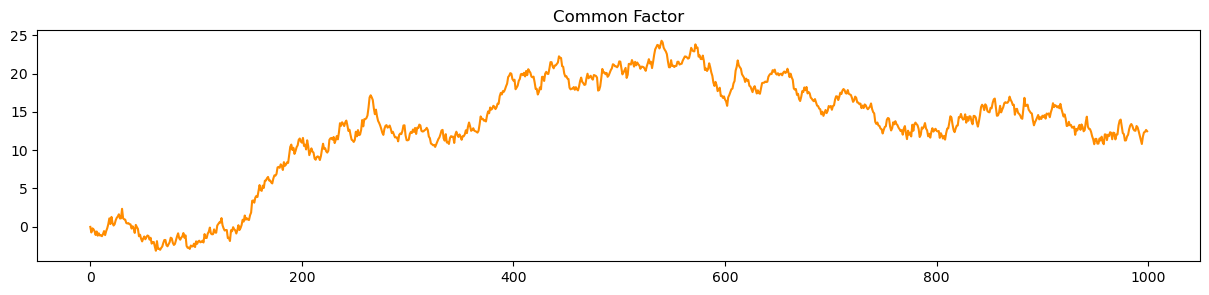

In [3]:
plt.figure(figsize=(15, 3))
plt.plot(z, color = "darkorange")
plt.title("Common Factor")
plt.show()

### Number of Bubble Series 40%

In [5]:
num_of_rw = 0.4

## N = 300

In [7]:
T = 300
e = eps[:T,:].copy()
common_fac = z[:T].copy()

In [8]:
# 1

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

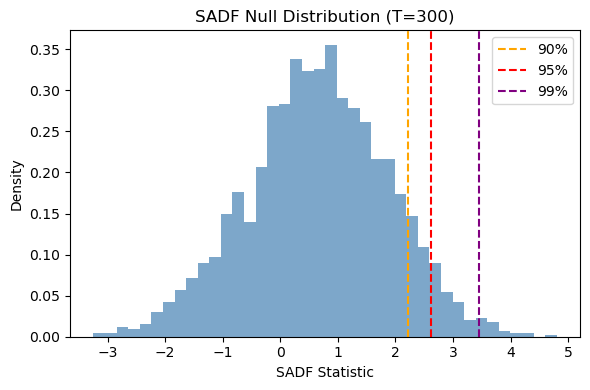

     Critical Value
90%        2.217727
95%        2.616363
99%        3.454837


Running Simulations: |██████████████████████████████| 100% --- 1500/1500

Mean SADF: 4.396
Median SADF: 4.097
Min SADF: -3.246
Max SADF: 12.9
Standard deviation: 3.183
25th percentile: 1.831
75th percentile: 6.871
95th percentile: 9.862
99th percentile: 11.53


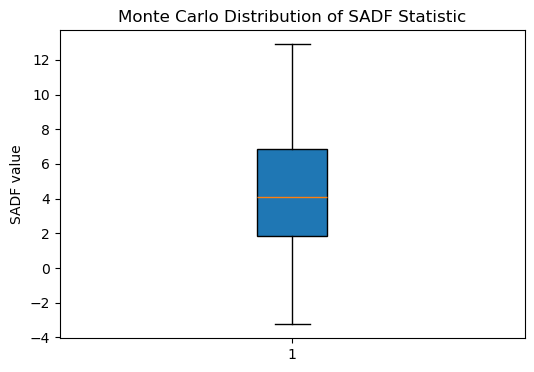

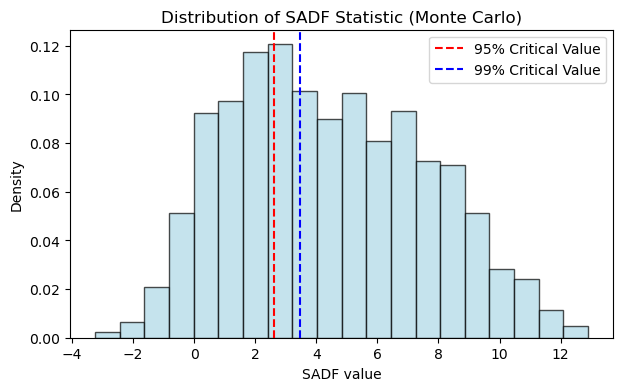

Empirical power at this setting: 0.66


In [9]:
coint_frac = 0.4
B = 2000
crit_val = mf.simulate_sadf_distribution(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers, common_fac = common_fac, e = e)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)
print("\n")

""" Run Experiment """
sadf_list = []
B = 1500
for i in range(B):
    innov = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
    sadf_val = mf.run_sadf_bubble_check_2( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
    sadf_list.append(sadf_val)
    loading_bar(i + 1, B)

sadf_array = np.array(sadf_list)
print("\n")
print("Mean SADF:", np.round(np.mean(sadf_array), 3))
print("Median SADF:", np.round(np.median(sadf_array), 3))
print("Min SADF:", np.round(np.min(sadf_array), 3))
print("Max SADF:", np.round(np.max(sadf_array), 3))
print("Standard deviation:", np.round(np.std(sadf_array), 3))
print("25th percentile:", np.round(np.percentile(sadf_array, 25), 3))
print("75th percentile:", np.round(np.percentile(sadf_array, 75), 3))
print("95th percentile:", np.round(np.percentile(sadf_array, 95), 3))
print("99th percentile:", np.round(np.percentile(sadf_array, 99), 3))

plt.figure(figsize=(6,4))
plt.boxplot(sadf_array, vert=True, patch_artist=True)
plt.title("Monte Carlo Distribution of SADF Statistic")
plt.ylabel("SADF value")
plt.show()

plt.figure(figsize=(7,4))
plt.hist(sadf_array, bins=20, color='lightblue', edgecolor='k', alpha=0.7, density=True)
plt.axvline(crit_val_95, color='red', linestyle='--', label='95% Critical Value')
plt.axvline(crit_val_99, color='blue', linestyle='--', label='99% Critical Value')
plt.title("Distribution of SADF Statistic (Monte Carlo)")
plt.xlabel("SADF value")
plt.ylabel("Density")
plt.legend()
plt.show()

power = np.mean(sadf_array > crit_val_95)
print("Empirical power at this setting:", np.round(power, 3))

mean_val   = np.round(np.mean(sadf_array), 3)
median_val = np.round(np.median(sadf_array), 3)
min_val    = np.round(np.min(sadf_array), 3)
max_val    = np.round(np.max(sadf_array), 3)
std_val    = np.round(np.std(sadf_array), 3)
p25_val    = np.round(np.percentile(sadf_array, 25), 3)
p75_val    = np.round(np.percentile(sadf_array, 75), 3)
p95_val    = np.round(np.percentile(sadf_array, 95), 3)
p99_val    = np.round(np.percentile(sadf_array, 99), 3)

SADF_mean_list.append(mean_val)
SADF_median_list.append(median_val)
SADF_min_list.append(min_val)
SADF_max_list.append(max_val)
SADF_std_list.append(std_val)
SADF_p25_list.append(p25_val)
SADF_p75_list.append(p75_val)
SADF_p95_list.append(p95_val)
SADF_p99_list.append(p99_val)
T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)
power_list.append(power)

In [10]:
# 2 

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

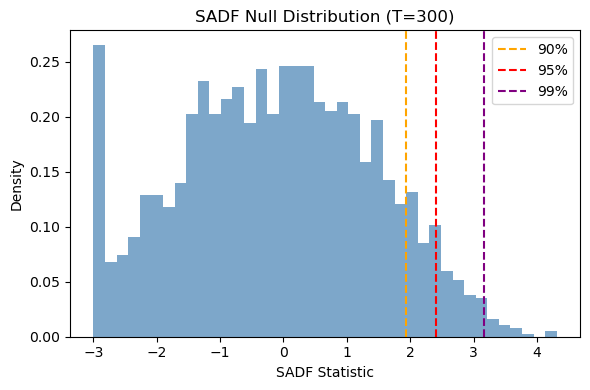

     Critical Value
90%        1.937020
95%        2.405862
99%        3.156225


Running Simulations: |██████████████████████████████| 100% --- 1500/1500

Mean SADF: 3.167
Median SADF: 3.194
Min SADF: -2.998
Max SADF: 10.644
Standard deviation: 2.754
25th percentile: 1.159
75th percentile: 5.197
95th percentile: 7.719
99th percentile: 8.922


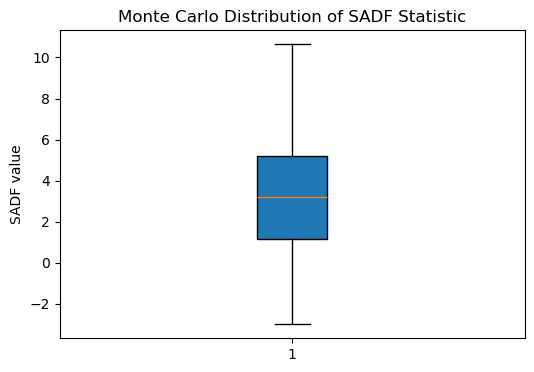

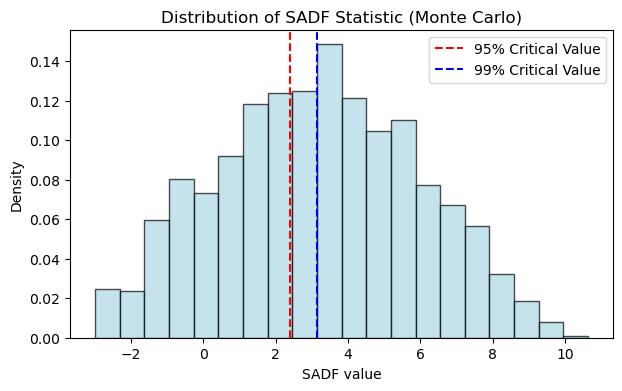

Empirical power at this setting: 0.601


In [11]:
coint_frac = 0.6
B = 2000
crit_val = mf.simulate_sadf_distribution(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers, common_fac = common_fac, e = e)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)
print("\n")

""" Run Experiment """
sadf_list = []
B = 1500
for i in range(B):
    innov = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
    sadf_val = mf.run_sadf_bubble_check_2( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
    sadf_list.append(sadf_val)
    loading_bar(i + 1, B)

sadf_array = np.array(sadf_list)
print("\n")
print("Mean SADF:", np.round(np.mean(sadf_array), 3))
print("Median SADF:", np.round(np.median(sadf_array), 3))
print("Min SADF:", np.round(np.min(sadf_array), 3))
print("Max SADF:", np.round(np.max(sadf_array), 3))
print("Standard deviation:", np.round(np.std(sadf_array), 3))
print("25th percentile:", np.round(np.percentile(sadf_array, 25), 3))
print("75th percentile:", np.round(np.percentile(sadf_array, 75), 3))
print("95th percentile:", np.round(np.percentile(sadf_array, 95), 3))
print("99th percentile:", np.round(np.percentile(sadf_array, 99), 3))

plt.figure(figsize=(6,4))
plt.boxplot(sadf_array, vert=True, patch_artist=True)
plt.title("Monte Carlo Distribution of SADF Statistic")
plt.ylabel("SADF value")
plt.show()

plt.figure(figsize=(7,4))
plt.hist(sadf_array, bins=20, color='lightblue', edgecolor='k', alpha=0.7, density=True)
plt.axvline(crit_val_95, color='red', linestyle='--', label='95% Critical Value')
plt.axvline(crit_val_99, color='blue', linestyle='--', label='99% Critical Value')
plt.title("Distribution of SADF Statistic (Monte Carlo)")
plt.xlabel("SADF value")
plt.ylabel("Density")
plt.legend()
plt.show()

power = np.mean(sadf_array > crit_val_95)
print("Empirical power at this setting:", np.round(power, 3))

mean_val   = np.round(np.mean(sadf_array), 3)
median_val = np.round(np.median(sadf_array), 3)
min_val    = np.round(np.min(sadf_array), 3)
max_val    = np.round(np.max(sadf_array), 3)
std_val    = np.round(np.std(sadf_array), 3)
p25_val    = np.round(np.percentile(sadf_array, 25), 3)
p75_val    = np.round(np.percentile(sadf_array, 75), 3)
p95_val    = np.round(np.percentile(sadf_array, 95), 3)
p99_val    = np.round(np.percentile(sadf_array, 99), 3)

SADF_mean_list.append(mean_val)
SADF_median_list.append(median_val)
SADF_min_list.append(min_val)
SADF_max_list.append(max_val)
SADF_std_list.append(std_val)
SADF_p25_list.append(p25_val)
SADF_p75_list.append(p75_val)
SADF_p95_list.append(p95_val)
SADF_p99_list.append(p99_val)
T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)
power_list.append(power)

In [12]:
# 3

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

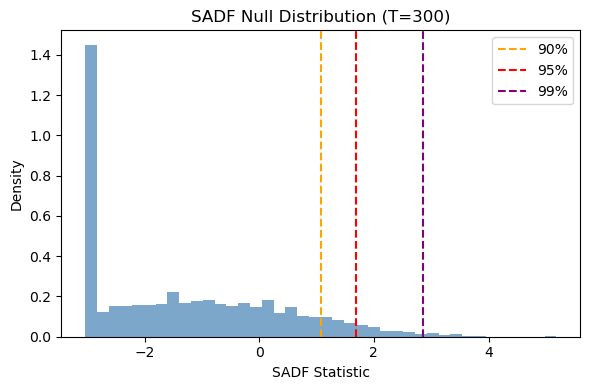

     Critical Value
90%        1.081519
95%        1.679170
99%        2.850224


Running Simulations: |██████████████████████████████| 100% --- 1500/1500

Mean SADF: 0.202
Median SADF: 0.081
Min SADF: -3.043
Max SADF: 8.806
Standard deviation: 2.441
25th percentile: -1.916
75th percentile: 2.065
95th percentile: 4.476
99th percentile: 5.691


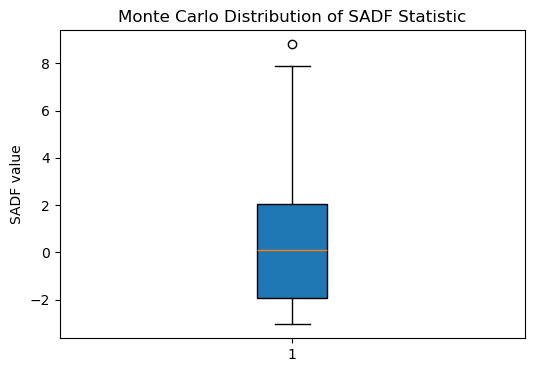

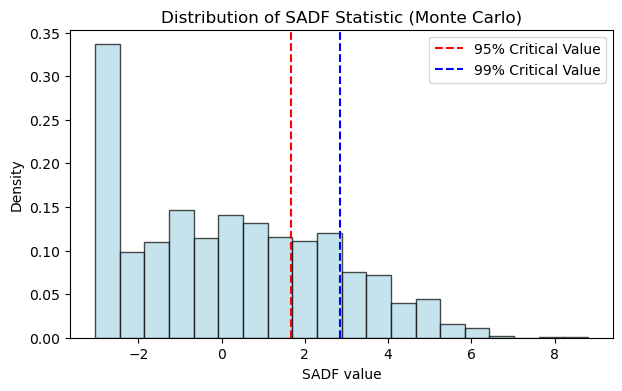

Empirical power at this setting: 0.294


In [13]:
coint_frac = 0.8
B = 2000
crit_val = mf.simulate_sadf_distribution(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers, common_fac = common_fac, e = e)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)
print("\n")

""" Run Experiment """
sadf_list = []
B = 1500
for i in range(B):
    innov = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
    sadf_val = mf.run_sadf_bubble_check_2( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
    sadf_list.append(sadf_val)
    loading_bar(i + 1, B)

sadf_array = np.array(sadf_list)
print("\n")
print("Mean SADF:", np.round(np.mean(sadf_array), 3))
print("Median SADF:", np.round(np.median(sadf_array), 3))
print("Min SADF:", np.round(np.min(sadf_array), 3))
print("Max SADF:", np.round(np.max(sadf_array), 3))
print("Standard deviation:", np.round(np.std(sadf_array), 3))
print("25th percentile:", np.round(np.percentile(sadf_array, 25), 3))
print("75th percentile:", np.round(np.percentile(sadf_array, 75), 3))
print("95th percentile:", np.round(np.percentile(sadf_array, 95), 3))
print("99th percentile:", np.round(np.percentile(sadf_array, 99), 3))

plt.figure(figsize=(6,4))
plt.boxplot(sadf_array, vert=True, patch_artist=True)
plt.title("Monte Carlo Distribution of SADF Statistic")
plt.ylabel("SADF value")
plt.show()

plt.figure(figsize=(7,4))
plt.hist(sadf_array, bins=20, color='lightblue', edgecolor='k', alpha=0.7, density=True)
plt.axvline(crit_val_95, color='red', linestyle='--', label='95% Critical Value')
plt.axvline(crit_val_99, color='blue', linestyle='--', label='99% Critical Value')
plt.title("Distribution of SADF Statistic (Monte Carlo)")
plt.xlabel("SADF value")
plt.ylabel("Density")
plt.legend()
plt.show()

power = np.mean(sadf_array > crit_val_95)
print("Empirical power at this setting:", np.round(power, 3))

mean_val   = np.round(np.mean(sadf_array), 3)
median_val = np.round(np.median(sadf_array), 3)
min_val    = np.round(np.min(sadf_array), 3)
max_val    = np.round(np.max(sadf_array), 3)
std_val    = np.round(np.std(sadf_array), 3)
p25_val    = np.round(np.percentile(sadf_array, 25), 3)
p75_val    = np.round(np.percentile(sadf_array, 75), 3)
p95_val    = np.round(np.percentile(sadf_array, 95), 3)
p99_val    = np.round(np.percentile(sadf_array, 99), 3)

SADF_mean_list.append(mean_val)
SADF_median_list.append(median_val)
SADF_min_list.append(min_val)
SADF_max_list.append(max_val)
SADF_std_list.append(std_val)
SADF_p25_list.append(p25_val)
SADF_p75_list.append(p75_val)
SADF_p95_list.append(p95_val)
SADF_p99_list.append(p99_val)
T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)
power_list.append(power)

## N = 500

In [15]:
T = 500
e = eps[:T,:].copy()
common_fac = z[:T].copy()

In [16]:
# 34

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

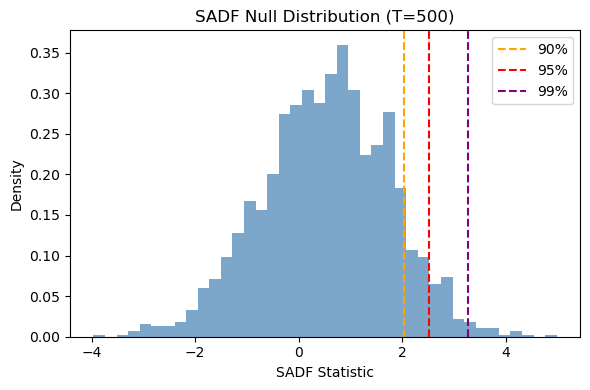

     Critical Value
90%        2.040546
95%        2.518058
99%        3.274024


Running Simulations: |██████████████████████████████| 100% --- 1500/1500

Mean SADF: 15.924
Median SADF: 17.576
Min SADF: -2.264
Max SADF: 20.781
Standard deviation: 4.379
25th percentile: 15.537
75th percentile: 18.432
95th percentile: 19.464
99th percentile: 20.097


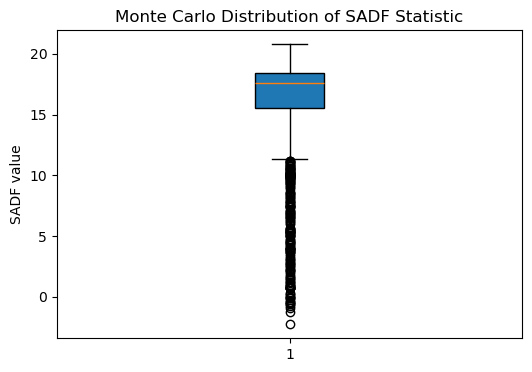

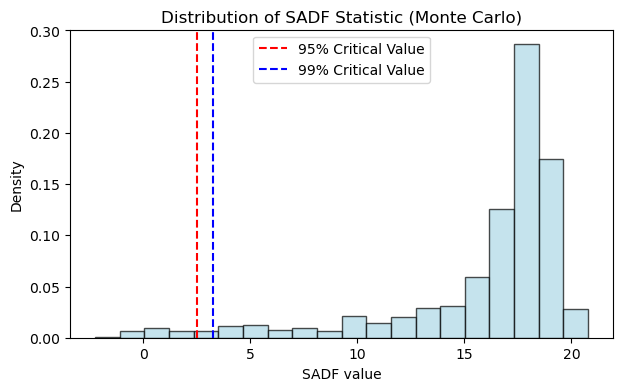

Empirical power at this setting: 0.971


In [17]:
coint_frac = 0.4
B = 2000
crit_val = mf.simulate_sadf_distribution(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers, common_fac = common_fac, e = e)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)
print("\n")

""" Run Experiment """
sadf_list = []
B = 1500
for i in range(B):
    innov = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
    sadf_val = mf.run_sadf_bubble_check_2( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
    sadf_list.append(sadf_val)
    loading_bar(i + 1, B)

sadf_array = np.array(sadf_list)
print("\n")
print("Mean SADF:", np.round(np.mean(sadf_array), 3))
print("Median SADF:", np.round(np.median(sadf_array), 3))
print("Min SADF:", np.round(np.min(sadf_array), 3))
print("Max SADF:", np.round(np.max(sadf_array), 3))
print("Standard deviation:", np.round(np.std(sadf_array), 3))
print("25th percentile:", np.round(np.percentile(sadf_array, 25), 3))
print("75th percentile:", np.round(np.percentile(sadf_array, 75), 3))
print("95th percentile:", np.round(np.percentile(sadf_array, 95), 3))
print("99th percentile:", np.round(np.percentile(sadf_array, 99), 3))

plt.figure(figsize=(6,4))
plt.boxplot(sadf_array, vert=True, patch_artist=True)
plt.title("Monte Carlo Distribution of SADF Statistic")
plt.ylabel("SADF value")
plt.show()

plt.figure(figsize=(7,4))
plt.hist(sadf_array, bins=20, color='lightblue', edgecolor='k', alpha=0.7, density=True)
plt.axvline(crit_val_95, color='red', linestyle='--', label='95% Critical Value')
plt.axvline(crit_val_99, color='blue', linestyle='--', label='99% Critical Value')
plt.title("Distribution of SADF Statistic (Monte Carlo)")
plt.xlabel("SADF value")
plt.ylabel("Density")
plt.legend()
plt.show()

power = np.mean(sadf_array > crit_val_95)
print("Empirical power at this setting:", np.round(power, 3))

mean_val   = np.round(np.mean(sadf_array), 3)
median_val = np.round(np.median(sadf_array), 3)
min_val    = np.round(np.min(sadf_array), 3)
max_val    = np.round(np.max(sadf_array), 3)
std_val    = np.round(np.std(sadf_array), 3)
p25_val    = np.round(np.percentile(sadf_array, 25), 3)
p75_val    = np.round(np.percentile(sadf_array, 75), 3)
p95_val    = np.round(np.percentile(sadf_array, 95), 3)
p99_val    = np.round(np.percentile(sadf_array, 99), 3)

SADF_mean_list.append(mean_val)
SADF_median_list.append(median_val)
SADF_min_list.append(min_val)
SADF_max_list.append(max_val)
SADF_std_list.append(std_val)
SADF_p25_list.append(p25_val)
SADF_p75_list.append(p75_val)
SADF_p95_list.append(p95_val)
SADF_p99_list.append(p99_val)
T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)
power_list.append(power)

In [18]:
# 35

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

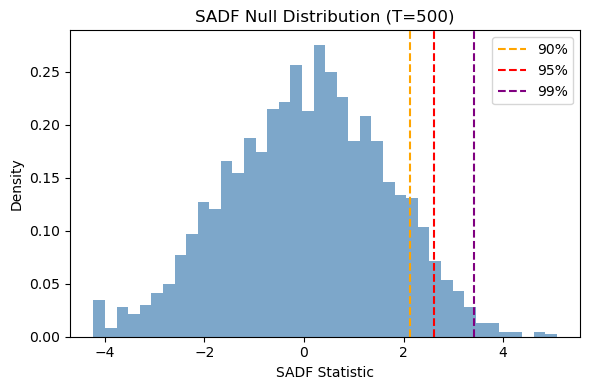

     Critical Value
90%        2.130651
95%        2.611984
99%        3.410699


Running Simulations: |██████████████████████████████| 100% --- 1500/1500

Mean SADF: 9.11
Median SADF: 9.786
Min SADF: -4.227
Max SADF: 19.377
Standard deviation: 5.498
25th percentile: 4.612
75th percentile: 13.793
95th percentile: 16.912
99th percentile: 17.87


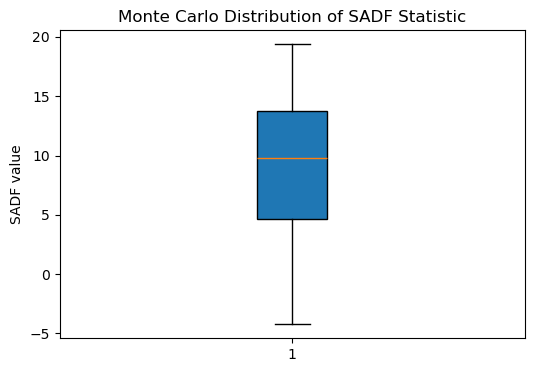

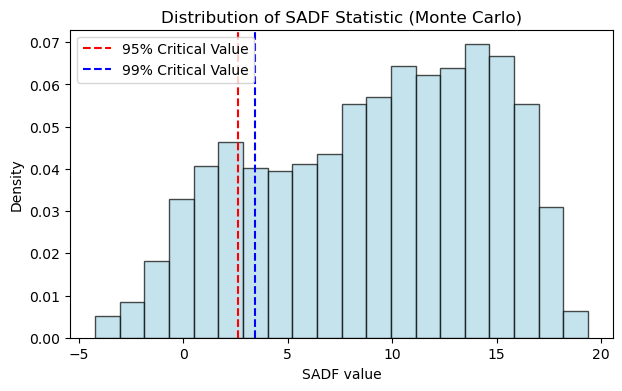

Empirical power at this setting: 0.829


In [19]:
coint_frac = 0.6
B = 2000
crit_val = mf.simulate_sadf_distribution(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers, common_fac = common_fac, e = e)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)
print("\n")

""" Run Experiment """
sadf_list = []
B = 1500
for i in range(B):
    innov = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
    sadf_val = mf.run_sadf_bubble_check_2( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
    sadf_list.append(sadf_val)
    loading_bar(i + 1, B)

sadf_array = np.array(sadf_list)
print("\n")
print("Mean SADF:", np.round(np.mean(sadf_array), 3))
print("Median SADF:", np.round(np.median(sadf_array), 3))
print("Min SADF:", np.round(np.min(sadf_array), 3))
print("Max SADF:", np.round(np.max(sadf_array), 3))
print("Standard deviation:", np.round(np.std(sadf_array), 3))
print("25th percentile:", np.round(np.percentile(sadf_array, 25), 3))
print("75th percentile:", np.round(np.percentile(sadf_array, 75), 3))
print("95th percentile:", np.round(np.percentile(sadf_array, 95), 3))
print("99th percentile:", np.round(np.percentile(sadf_array, 99), 3))

plt.figure(figsize=(6,4))
plt.boxplot(sadf_array, vert=True, patch_artist=True)
plt.title("Monte Carlo Distribution of SADF Statistic")
plt.ylabel("SADF value")
plt.show()

plt.figure(figsize=(7,4))
plt.hist(sadf_array, bins=20, color='lightblue', edgecolor='k', alpha=0.7, density=True)
plt.axvline(crit_val_95, color='red', linestyle='--', label='95% Critical Value')
plt.axvline(crit_val_99, color='blue', linestyle='--', label='99% Critical Value')
plt.title("Distribution of SADF Statistic (Monte Carlo)")
plt.xlabel("SADF value")
plt.ylabel("Density")
plt.legend()
plt.show()

power = np.mean(sadf_array > crit_val_95)
print("Empirical power at this setting:", np.round(power, 3))

mean_val   = np.round(np.mean(sadf_array), 3)
median_val = np.round(np.median(sadf_array), 3)
min_val    = np.round(np.min(sadf_array), 3)
max_val    = np.round(np.max(sadf_array), 3)
std_val    = np.round(np.std(sadf_array), 3)
p25_val    = np.round(np.percentile(sadf_array, 25), 3)
p75_val    = np.round(np.percentile(sadf_array, 75), 3)
p95_val    = np.round(np.percentile(sadf_array, 95), 3)
p99_val    = np.round(np.percentile(sadf_array, 99), 3)

SADF_mean_list.append(mean_val)
SADF_median_list.append(median_val)
SADF_min_list.append(min_val)
SADF_max_list.append(max_val)
SADF_std_list.append(std_val)
SADF_p25_list.append(p25_val)
SADF_p75_list.append(p75_val)
SADF_p95_list.append(p95_val)
SADF_p99_list.append(p99_val)
T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)
power_list.append(power)

In [20]:
# 36

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

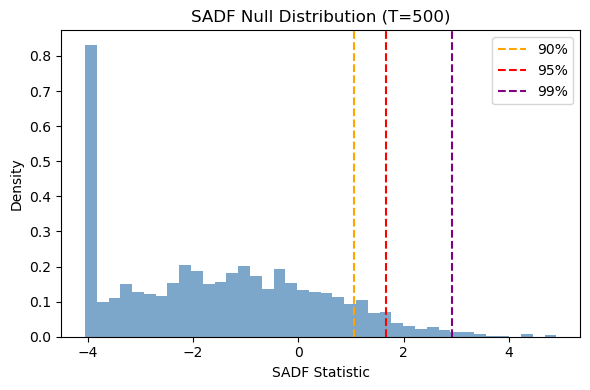

     Critical Value
90%        1.066195
95%        1.659156
99%        2.913967


Running Simulations: |██████████████████████████████| 100% --- 1500/1500

Mean SADF: 4.01
Median SADF: 4.32
Min SADF: -4.049
Max SADF: 12.674
Standard deviation: 3.457
25th percentile: 1.988
75th percentile: 6.522
95th percentile: 9.032
99th percentile: 10.824


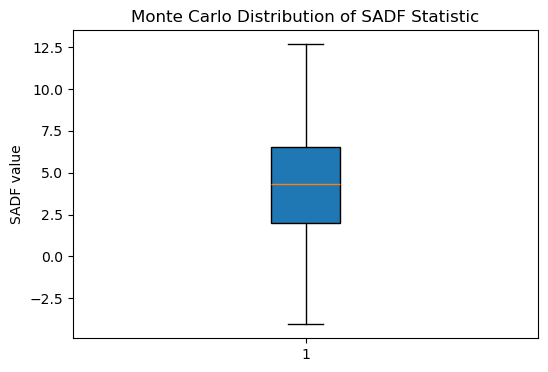

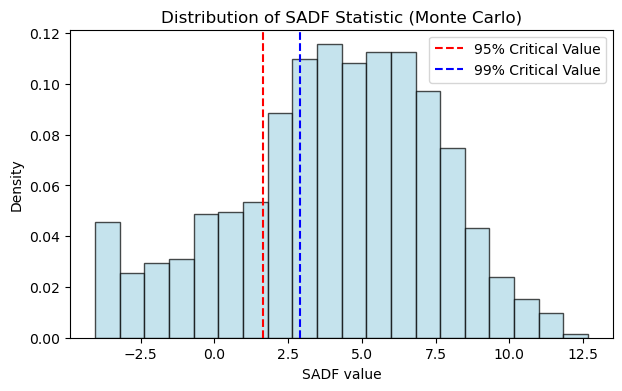

Empirical power at this setting: 0.769


In [21]:
coint_frac = 0.8
B = 2000
crit_val = mf.simulate_sadf_distribution(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers, common_fac = common_fac, e = e)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)
print("\n")

""" Run Experiment """
sadf_list = []
B = 1500
for i in range(B):
    innov = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
    sadf_val = mf.run_sadf_bubble_check_2( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
    sadf_list.append(sadf_val)
    loading_bar(i + 1, B)

sadf_array = np.array(sadf_list)
print("\n")
print("Mean SADF:", np.round(np.mean(sadf_array), 3))
print("Median SADF:", np.round(np.median(sadf_array), 3))
print("Min SADF:", np.round(np.min(sadf_array), 3))
print("Max SADF:", np.round(np.max(sadf_array), 3))
print("Standard deviation:", np.round(np.std(sadf_array), 3))
print("25th percentile:", np.round(np.percentile(sadf_array, 25), 3))
print("75th percentile:", np.round(np.percentile(sadf_array, 75), 3))
print("95th percentile:", np.round(np.percentile(sadf_array, 95), 3))
print("99th percentile:", np.round(np.percentile(sadf_array, 99), 3))

plt.figure(figsize=(6,4))
plt.boxplot(sadf_array, vert=True, patch_artist=True)
plt.title("Monte Carlo Distribution of SADF Statistic")
plt.ylabel("SADF value")
plt.show()

plt.figure(figsize=(7,4))
plt.hist(sadf_array, bins=20, color='lightblue', edgecolor='k', alpha=0.7, density=True)
plt.axvline(crit_val_95, color='red', linestyle='--', label='95% Critical Value')
plt.axvline(crit_val_99, color='blue', linestyle='--', label='99% Critical Value')
plt.title("Distribution of SADF Statistic (Monte Carlo)")
plt.xlabel("SADF value")
plt.ylabel("Density")
plt.legend()
plt.show()

power = np.mean(sadf_array > crit_val_95)
print("Empirical power at this setting:", np.round(power, 3))

mean_val   = np.round(np.mean(sadf_array), 3)
median_val = np.round(np.median(sadf_array), 3)
min_val    = np.round(np.min(sadf_array), 3)
max_val    = np.round(np.max(sadf_array), 3)
std_val    = np.round(np.std(sadf_array), 3)
p25_val    = np.round(np.percentile(sadf_array, 25), 3)
p75_val    = np.round(np.percentile(sadf_array, 75), 3)
p95_val    = np.round(np.percentile(sadf_array, 95), 3)
p99_val    = np.round(np.percentile(sadf_array, 99), 3)

SADF_mean_list.append(mean_val)
SADF_median_list.append(median_val)
SADF_min_list.append(min_val)
SADF_max_list.append(max_val)
SADF_std_list.append(std_val)
SADF_p25_list.append(p25_val)
SADF_p75_list.append(p75_val)
SADF_p95_list.append(p95_val)
SADF_p99_list.append(p99_val)
T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)
power_list.append(power)

## N = 800

In [23]:
T = 800
e = eps[:T,:].copy()
common_fac = z[:T].copy()

In [24]:
# 67

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

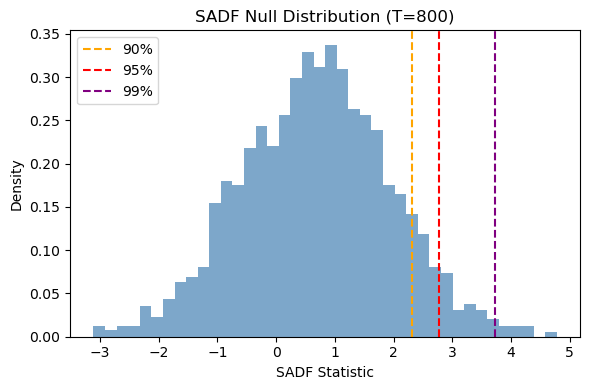

     Critical Value
90%        2.318382
95%        2.777604
99%        3.718946


Running Simulations: |██████████████████████████████| 100% --- 1500/1500

Mean SADF: 23.839
Median SADF: 24.088
Min SADF: 0.25
Max SADF: 27.31
Standard deviation: 1.98
25th percentile: 23.49
75th percentile: 24.629
95th percentile: 25.441
99th percentile: 25.893


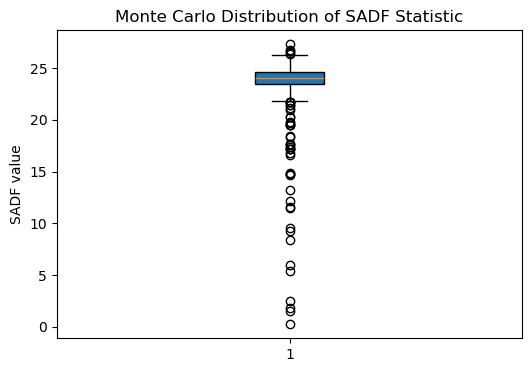

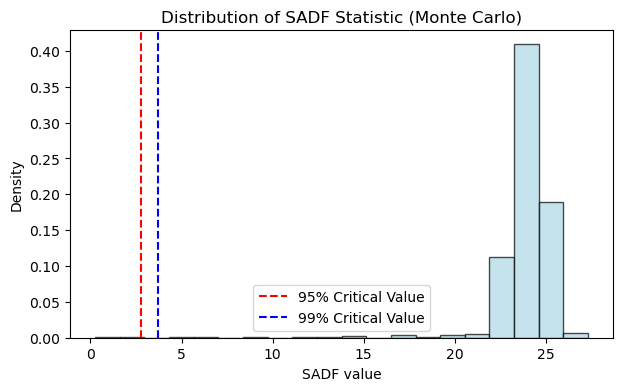

Empirical power at this setting: 0.997


In [25]:
coint_frac = 0.4
B = 2000
crit_val = mf.simulate_sadf_distribution(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers, common_fac = common_fac, e = e)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)
print("\n")

""" Run Experiment """
sadf_list = []
B = 1500
for i in range(B):
    innov = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
    sadf_val = mf.run_sadf_bubble_check_2( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
    sadf_list.append(sadf_val)
    loading_bar(i + 1, B)

sadf_array = np.array(sadf_list)
print("\n")
print("Mean SADF:", np.round(np.mean(sadf_array), 3))
print("Median SADF:", np.round(np.median(sadf_array), 3))
print("Min SADF:", np.round(np.min(sadf_array), 3))
print("Max SADF:", np.round(np.max(sadf_array), 3))
print("Standard deviation:", np.round(np.std(sadf_array), 3))
print("25th percentile:", np.round(np.percentile(sadf_array, 25), 3))
print("75th percentile:", np.round(np.percentile(sadf_array, 75), 3))
print("95th percentile:", np.round(np.percentile(sadf_array, 95), 3))
print("99th percentile:", np.round(np.percentile(sadf_array, 99), 3))

plt.figure(figsize=(6,4))
plt.boxplot(sadf_array, vert=True, patch_artist=True)
plt.title("Monte Carlo Distribution of SADF Statistic")
plt.ylabel("SADF value")
plt.show()

plt.figure(figsize=(7,4))
plt.hist(sadf_array, bins=20, color='lightblue', edgecolor='k', alpha=0.7, density=True)
plt.axvline(crit_val_95, color='red', linestyle='--', label='95% Critical Value')
plt.axvline(crit_val_99, color='blue', linestyle='--', label='99% Critical Value')
plt.title("Distribution of SADF Statistic (Monte Carlo)")
plt.xlabel("SADF value")
plt.ylabel("Density")
plt.legend()
plt.show()

power = np.mean(sadf_array > crit_val_95)
print("Empirical power at this setting:", np.round(power, 3))

mean_val   = np.round(np.mean(sadf_array), 3)
median_val = np.round(np.median(sadf_array), 3)
min_val    = np.round(np.min(sadf_array), 3)
max_val    = np.round(np.max(sadf_array), 3)
std_val    = np.round(np.std(sadf_array), 3)
p25_val    = np.round(np.percentile(sadf_array, 25), 3)
p75_val    = np.round(np.percentile(sadf_array, 75), 3)
p95_val    = np.round(np.percentile(sadf_array, 95), 3)
p99_val    = np.round(np.percentile(sadf_array, 99), 3)

SADF_mean_list.append(mean_val)
SADF_median_list.append(median_val)
SADF_min_list.append(min_val)
SADF_max_list.append(max_val)
SADF_std_list.append(std_val)
SADF_p25_list.append(p25_val)
SADF_p75_list.append(p75_val)
SADF_p95_list.append(p95_val)
SADF_p99_list.append(p99_val)
T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)
power_list.append(power)

In [26]:
# 68

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

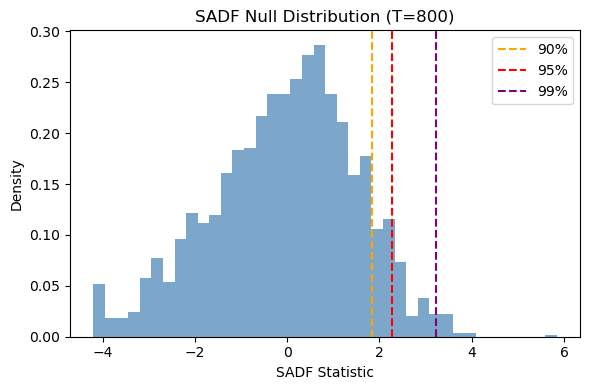

     Critical Value
90%        1.844233
95%        2.282233
99%        3.216322


Running Simulations: |██████████████████████████████| 100% --- 1500/1500

Mean SADF: 25.165
Median SADF: 26.338
Min SADF: -1.648
Max SADF: 29.198
Standard deviation: 4.24
25th percentile: 25.346
75th percentile: 27.012
95th percentile: 27.845
99th percentile: 28.414


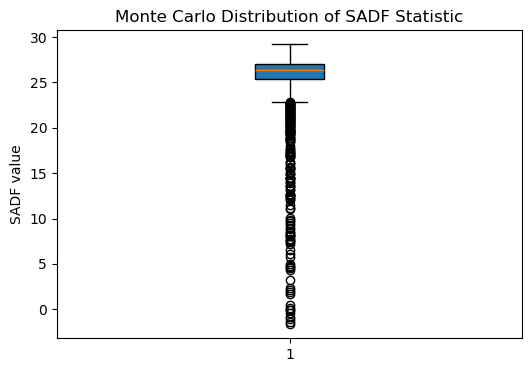

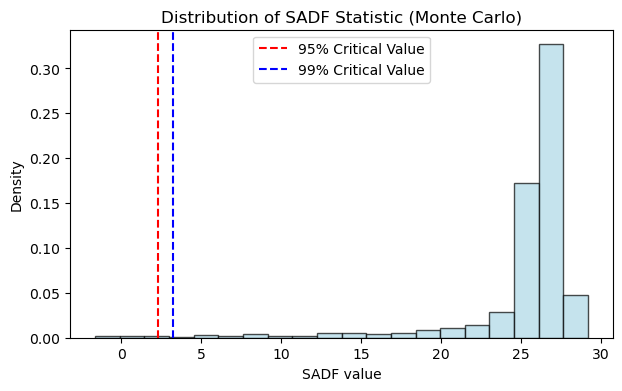

Empirical power at this setting: 0.992


In [27]:
coint_frac = 0.6
B = 2000
crit_val = mf.simulate_sadf_distribution(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers, common_fac = common_fac, e = e)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)
print("\n")

""" Run Experiment """
sadf_list = []
B = 1500
for i in range(B):
    innov = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
    sadf_val = mf.run_sadf_bubble_check_2( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
    sadf_list.append(sadf_val)
    loading_bar(i + 1, B)

sadf_array = np.array(sadf_list)
print("\n")
print("Mean SADF:", np.round(np.mean(sadf_array), 3))
print("Median SADF:", np.round(np.median(sadf_array), 3))
print("Min SADF:", np.round(np.min(sadf_array), 3))
print("Max SADF:", np.round(np.max(sadf_array), 3))
print("Standard deviation:", np.round(np.std(sadf_array), 3))
print("25th percentile:", np.round(np.percentile(sadf_array, 25), 3))
print("75th percentile:", np.round(np.percentile(sadf_array, 75), 3))
print("95th percentile:", np.round(np.percentile(sadf_array, 95), 3))
print("99th percentile:", np.round(np.percentile(sadf_array, 99), 3))

plt.figure(figsize=(6,4))
plt.boxplot(sadf_array, vert=True, patch_artist=True)
plt.title("Monte Carlo Distribution of SADF Statistic")
plt.ylabel("SADF value")
plt.show()

plt.figure(figsize=(7,4))
plt.hist(sadf_array, bins=20, color='lightblue', edgecolor='k', alpha=0.7, density=True)
plt.axvline(crit_val_95, color='red', linestyle='--', label='95% Critical Value')
plt.axvline(crit_val_99, color='blue', linestyle='--', label='99% Critical Value')
plt.title("Distribution of SADF Statistic (Monte Carlo)")
plt.xlabel("SADF value")
plt.ylabel("Density")
plt.legend()
plt.show()

power = np.mean(sadf_array > crit_val_95)
print("Empirical power at this setting:", np.round(power, 3))

mean_val   = np.round(np.mean(sadf_array), 3)
median_val = np.round(np.median(sadf_array), 3)
min_val    = np.round(np.min(sadf_array), 3)
max_val    = np.round(np.max(sadf_array), 3)
std_val    = np.round(np.std(sadf_array), 3)
p25_val    = np.round(np.percentile(sadf_array, 25), 3)
p75_val    = np.round(np.percentile(sadf_array, 75), 3)
p95_val    = np.round(np.percentile(sadf_array, 95), 3)
p99_val    = np.round(np.percentile(sadf_array, 99), 3)

SADF_mean_list.append(mean_val)
SADF_median_list.append(median_val)
SADF_min_list.append(min_val)
SADF_max_list.append(max_val)
SADF_std_list.append(std_val)
SADF_p25_list.append(p25_val)
SADF_p75_list.append(p75_val)
SADF_p95_list.append(p95_val)
SADF_p99_list.append(p99_val)
T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)
power_list.append(power)

In [28]:
# 69

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

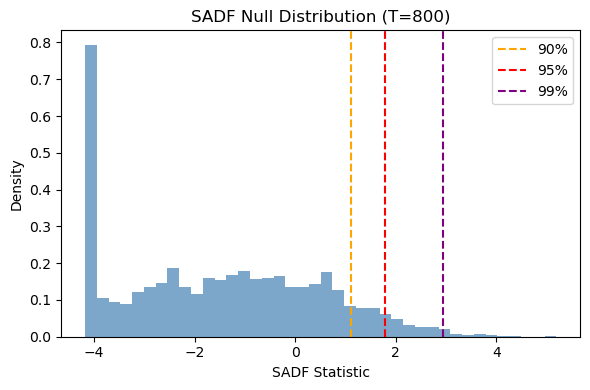

     Critical Value
90%        1.104355
95%        1.786756
99%        2.943561


Running Simulations: |██████████████████████████████| 100% --- 1500/1500

Mean SADF: 9.099
Median SADF: 9.561
Min SADF: -4.184
Max SADF: 22.638
Standard deviation: 5.974
25th percentile: 4.887
75th percentile: 13.556
95th percentile: 18.17
99th percentile: 20.217


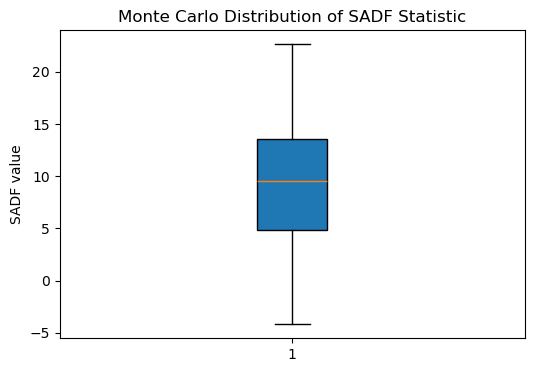

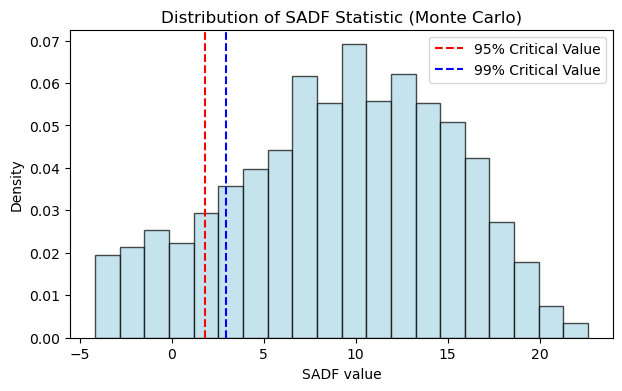

Empirical power at this setting: 0.865


In [29]:
coint_frac = 0.8
B = 2000
crit_val = mf.simulate_sadf_distribution(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers, common_fac = common_fac, e = e)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)
print("\n")

""" Run Experiment """
sadf_list = []
B = 1500
for i in range(B):
    innov = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
    sadf_val = mf.run_sadf_bubble_check_2( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
    sadf_list.append(sadf_val)
    loading_bar(i + 1, B)

sadf_array = np.array(sadf_list)
print("\n")
print("Mean SADF:", np.round(np.mean(sadf_array), 3))
print("Median SADF:", np.round(np.median(sadf_array), 3))
print("Min SADF:", np.round(np.min(sadf_array), 3))
print("Max SADF:", np.round(np.max(sadf_array), 3))
print("Standard deviation:", np.round(np.std(sadf_array), 3))
print("25th percentile:", np.round(np.percentile(sadf_array, 25), 3))
print("75th percentile:", np.round(np.percentile(sadf_array, 75), 3))
print("95th percentile:", np.round(np.percentile(sadf_array, 95), 3))
print("99th percentile:", np.round(np.percentile(sadf_array, 99), 3))

plt.figure(figsize=(6,4))
plt.boxplot(sadf_array, vert=True, patch_artist=True)
plt.title("Monte Carlo Distribution of SADF Statistic")
plt.ylabel("SADF value")
plt.show()

plt.figure(figsize=(7,4))
plt.hist(sadf_array, bins=20, color='lightblue', edgecolor='k', alpha=0.7, density=True)
plt.axvline(crit_val_95, color='red', linestyle='--', label='95% Critical Value')
plt.axvline(crit_val_99, color='blue', linestyle='--', label='99% Critical Value')
plt.title("Distribution of SADF Statistic (Monte Carlo)")
plt.xlabel("SADF value")
plt.ylabel("Density")
plt.legend()
plt.show()

power = np.mean(sadf_array > crit_val_95)
print("Empirical power at this setting:", np.round(power, 3))

mean_val   = np.round(np.mean(sadf_array), 3)
median_val = np.round(np.median(sadf_array), 3)
min_val    = np.round(np.min(sadf_array), 3)
max_val    = np.round(np.max(sadf_array), 3)
std_val    = np.round(np.std(sadf_array), 3)
p25_val    = np.round(np.percentile(sadf_array, 25), 3)
p75_val    = np.round(np.percentile(sadf_array, 75), 3)
p95_val    = np.round(np.percentile(sadf_array, 95), 3)
p99_val    = np.round(np.percentile(sadf_array, 99), 3)

SADF_mean_list.append(mean_val)
SADF_median_list.append(median_val)
SADF_min_list.append(min_val)
SADF_max_list.append(max_val)
SADF_std_list.append(std_val)
SADF_p25_list.append(p25_val)
SADF_p75_list.append(p75_val)
SADF_p95_list.append(p95_val)
SADF_p99_list.append(p99_val)
T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)
power_list.append(power)

## N = 1000

In [31]:
T = 1000
e = eps[:T,:].copy()
common_fac = z[:T].copy()

In [32]:
# 100

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

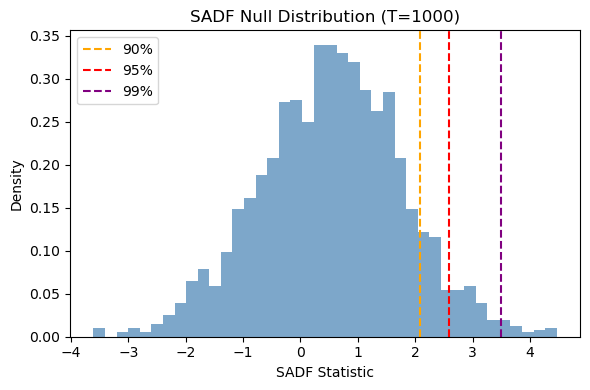

     Critical Value
90%        2.079809
95%        2.581843
99%        3.486102


Running Simulations: |██████████████████████████████| 100% --- 1500/1500

Mean SADF: 27.204
Median SADF: 27.191
Min SADF: 12.209
Max SADF: 30.447
Standard deviation: 0.895
25th percentile: 26.678
75th percentile: 27.723
95th percentile: 28.558
99th percentile: 29.29


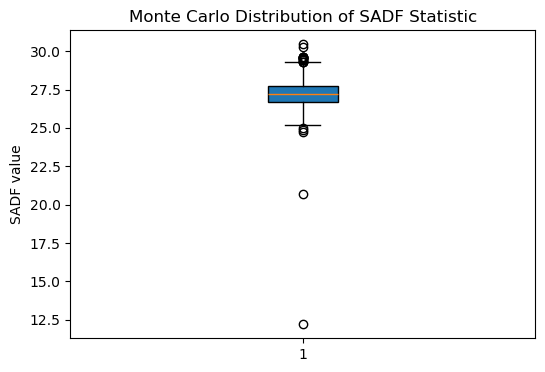

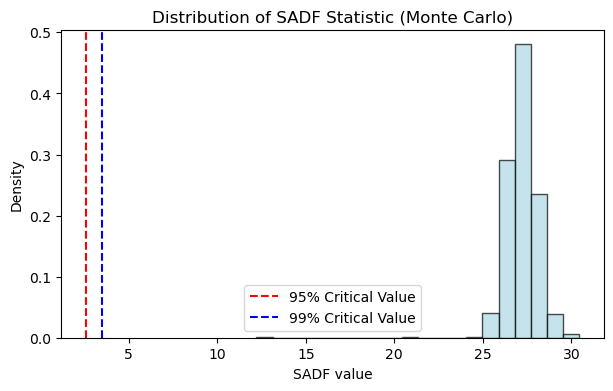

Empirical power at this setting: 1.0


In [33]:
coint_frac = 0.4
B = 2000
crit_val = mf.simulate_sadf_distribution(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers, common_fac = common_fac, e = e)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)
print("\n")

""" Run Experiment """
sadf_list = []
B = 1500
for i in range(B):
    innov = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
    sadf_val = mf.run_sadf_bubble_check_2( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
    sadf_list.append(sadf_val)
    loading_bar(i + 1, B)

sadf_array = np.array(sadf_list)
print("\n")
print("Mean SADF:", np.round(np.mean(sadf_array), 3))
print("Median SADF:", np.round(np.median(sadf_array), 3))
print("Min SADF:", np.round(np.min(sadf_array), 3))
print("Max SADF:", np.round(np.max(sadf_array), 3))
print("Standard deviation:", np.round(np.std(sadf_array), 3))
print("25th percentile:", np.round(np.percentile(sadf_array, 25), 3))
print("75th percentile:", np.round(np.percentile(sadf_array, 75), 3))
print("95th percentile:", np.round(np.percentile(sadf_array, 95), 3))
print("99th percentile:", np.round(np.percentile(sadf_array, 99), 3))

plt.figure(figsize=(6,4))
plt.boxplot(sadf_array, vert=True, patch_artist=True)
plt.title("Monte Carlo Distribution of SADF Statistic")
plt.ylabel("SADF value")
plt.show()

plt.figure(figsize=(7,4))
plt.hist(sadf_array, bins=20, color='lightblue', edgecolor='k', alpha=0.7, density=True)
plt.axvline(crit_val_95, color='red', linestyle='--', label='95% Critical Value')
plt.axvline(crit_val_99, color='blue', linestyle='--', label='99% Critical Value')
plt.title("Distribution of SADF Statistic (Monte Carlo)")
plt.xlabel("SADF value")
plt.ylabel("Density")
plt.legend()
plt.show()

power = np.mean(sadf_array > crit_val_95)
print("Empirical power at this setting:", np.round(power, 3))

mean_val   = np.round(np.mean(sadf_array), 3)
median_val = np.round(np.median(sadf_array), 3)
min_val    = np.round(np.min(sadf_array), 3)
max_val    = np.round(np.max(sadf_array), 3)
std_val    = np.round(np.std(sadf_array), 3)
p25_val    = np.round(np.percentile(sadf_array, 25), 3)
p75_val    = np.round(np.percentile(sadf_array, 75), 3)
p95_val    = np.round(np.percentile(sadf_array, 95), 3)
p99_val    = np.round(np.percentile(sadf_array, 99), 3)

SADF_mean_list.append(mean_val)
SADF_median_list.append(median_val)
SADF_min_list.append(min_val)
SADF_max_list.append(max_val)
SADF_std_list.append(std_val)
SADF_p25_list.append(p25_val)
SADF_p75_list.append(p75_val)
SADF_p95_list.append(p95_val)
SADF_p99_list.append(p99_val)
T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)
power_list.append(power)

In [34]:
# 101

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

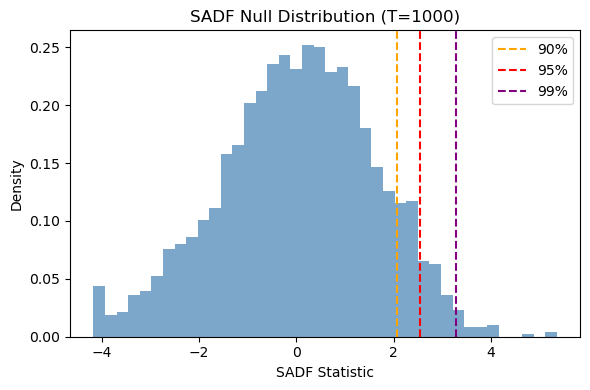

     Critical Value
90%        2.075014
95%        2.544943
99%        3.274034


Running Simulations: |██████████████████████████████| 100% --- 1500/1500

Mean SADF: 30.032
Median SADF: 30.74
Min SADF: -2.189
Max SADF: 34.068
Standard deviation: 3.687
25th percentile: 30.096
75th percentile: 31.294
95th percentile: 32.069
99th percentile: 32.58


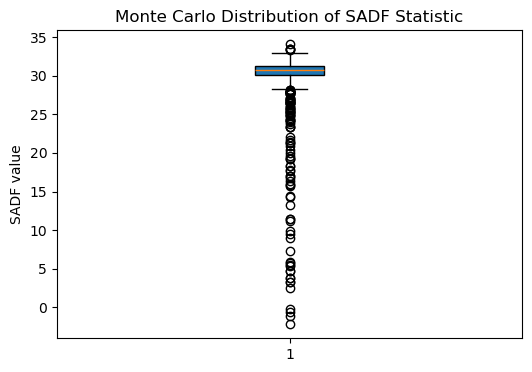

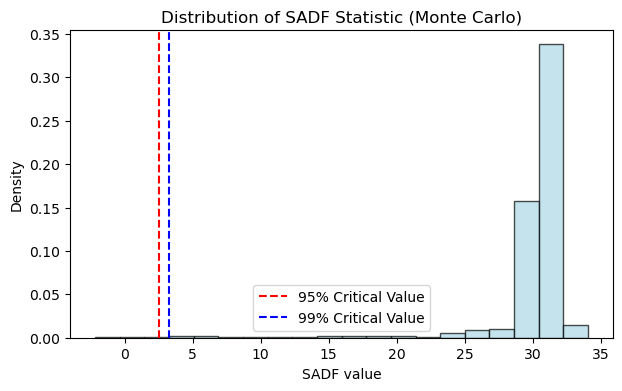

Empirical power at this setting: 0.997


In [35]:
coint_frac = 0.6
B = 2000
crit_val = mf.simulate_sadf_distribution(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers, common_fac = common_fac, e = e)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)
print("\n")

""" Run Experiment """
sadf_list = []
B = 1500
for i in range(B):
    innov = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
    sadf_val = mf.run_sadf_bubble_check_2( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
    sadf_list.append(sadf_val)
    loading_bar(i + 1, B)

sadf_array = np.array(sadf_list)
print("\n")
print("Mean SADF:", np.round(np.mean(sadf_array), 3))
print("Median SADF:", np.round(np.median(sadf_array), 3))
print("Min SADF:", np.round(np.min(sadf_array), 3))
print("Max SADF:", np.round(np.max(sadf_array), 3))
print("Standard deviation:", np.round(np.std(sadf_array), 3))
print("25th percentile:", np.round(np.percentile(sadf_array, 25), 3))
print("75th percentile:", np.round(np.percentile(sadf_array, 75), 3))
print("95th percentile:", np.round(np.percentile(sadf_array, 95), 3))
print("99th percentile:", np.round(np.percentile(sadf_array, 99), 3))

plt.figure(figsize=(6,4))
plt.boxplot(sadf_array, vert=True, patch_artist=True)
plt.title("Monte Carlo Distribution of SADF Statistic")
plt.ylabel("SADF value")
plt.show()

plt.figure(figsize=(7,4))
plt.hist(sadf_array, bins=20, color='lightblue', edgecolor='k', alpha=0.7, density=True)
plt.axvline(crit_val_95, color='red', linestyle='--', label='95% Critical Value')
plt.axvline(crit_val_99, color='blue', linestyle='--', label='99% Critical Value')
plt.title("Distribution of SADF Statistic (Monte Carlo)")
plt.xlabel("SADF value")
plt.ylabel("Density")
plt.legend()
plt.show()

power = np.mean(sadf_array > crit_val_95)
print("Empirical power at this setting:", np.round(power, 3))

mean_val   = np.round(np.mean(sadf_array), 3)
median_val = np.round(np.median(sadf_array), 3)
min_val    = np.round(np.min(sadf_array), 3)
max_val    = np.round(np.max(sadf_array), 3)
std_val    = np.round(np.std(sadf_array), 3)
p25_val    = np.round(np.percentile(sadf_array, 25), 3)
p75_val    = np.round(np.percentile(sadf_array, 75), 3)
p95_val    = np.round(np.percentile(sadf_array, 95), 3)
p99_val    = np.round(np.percentile(sadf_array, 99), 3)

SADF_mean_list.append(mean_val)
SADF_median_list.append(median_val)
SADF_min_list.append(min_val)
SADF_max_list.append(max_val)
SADF_std_list.append(std_val)
SADF_p25_list.append(p25_val)
SADF_p75_list.append(p75_val)
SADF_p95_list.append(p95_val)
SADF_p99_list.append(p99_val)
T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)
power_list.append(power)

In [36]:
# 102

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

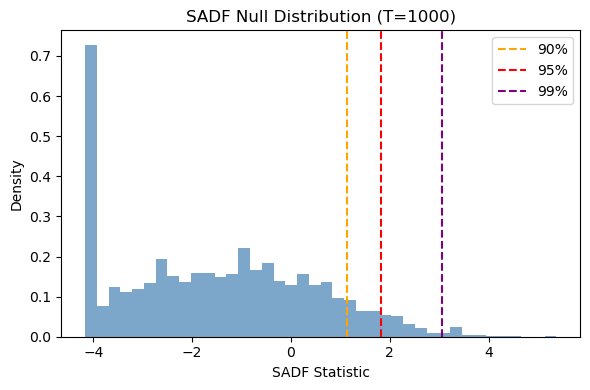

     Critical Value
90%        1.129501
95%        1.817589
99%        3.054042


Running Simulations: |██████████████████████████████| 100% --- 1500/1500

Mean SADF: 11.157
Median SADF: 11.582
Min SADF: -4.169
Max SADF: 27.816
Standard deviation: 7.939
25th percentile: 4.809
75th percentile: 17.549
95th percentile: 23.59
99th percentile: 26.533


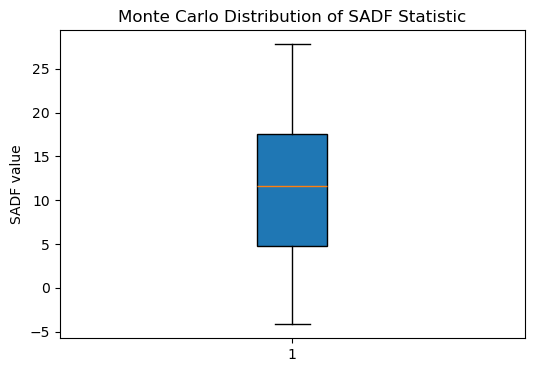

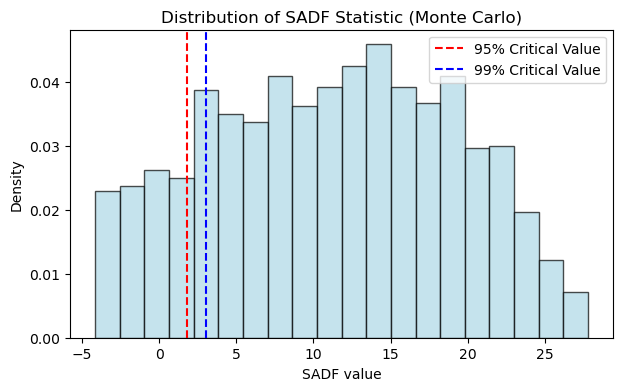

Empirical power at this setting: 0.851


In [37]:
coint_frac = 0.8
B = 2000
crit_val = mf.simulate_sadf_distribution(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers, common_fac = common_fac, e = e)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)
print("\n")

""" Run Experiment """
sadf_list = []
B = 1500
for i in range(B):
    innov = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
    sadf_val = mf.run_sadf_bubble_check_2( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
    sadf_list.append(sadf_val)
    loading_bar(i + 1, B)

sadf_array = np.array(sadf_list)
print("\n")
print("Mean SADF:", np.round(np.mean(sadf_array), 3))
print("Median SADF:", np.round(np.median(sadf_array), 3))
print("Min SADF:", np.round(np.min(sadf_array), 3))
print("Max SADF:", np.round(np.max(sadf_array), 3))
print("Standard deviation:", np.round(np.std(sadf_array), 3))
print("25th percentile:", np.round(np.percentile(sadf_array, 25), 3))
print("75th percentile:", np.round(np.percentile(sadf_array, 75), 3))
print("95th percentile:", np.round(np.percentile(sadf_array, 95), 3))
print("99th percentile:", np.round(np.percentile(sadf_array, 99), 3))

plt.figure(figsize=(6,4))
plt.boxplot(sadf_array, vert=True, patch_artist=True)
plt.title("Monte Carlo Distribution of SADF Statistic")
plt.ylabel("SADF value")
plt.show()

plt.figure(figsize=(7,4))
plt.hist(sadf_array, bins=20, color='lightblue', edgecolor='k', alpha=0.7, density=True)
plt.axvline(crit_val_95, color='red', linestyle='--', label='95% Critical Value')
plt.axvline(crit_val_99, color='blue', linestyle='--', label='99% Critical Value')
plt.title("Distribution of SADF Statistic (Monte Carlo)")
plt.xlabel("SADF value")
plt.ylabel("Density")
plt.legend()
plt.show()

power = np.mean(sadf_array > crit_val_95)
print("Empirical power at this setting:", np.round(power, 3))

mean_val   = np.round(np.mean(sadf_array), 3)
median_val = np.round(np.median(sadf_array), 3)
min_val    = np.round(np.min(sadf_array), 3)
max_val    = np.round(np.max(sadf_array), 3)
std_val    = np.round(np.std(sadf_array), 3)
p25_val    = np.round(np.percentile(sadf_array, 25), 3)
p75_val    = np.round(np.percentile(sadf_array, 75), 3)
p95_val    = np.round(np.percentile(sadf_array, 95), 3)
p99_val    = np.round(np.percentile(sadf_array, 99), 3)

SADF_mean_list.append(mean_val)
SADF_median_list.append(median_val)
SADF_min_list.append(min_val)
SADF_max_list.append(max_val)
SADF_std_list.append(std_val)
SADF_p25_list.append(p25_val)
SADF_p75_list.append(p75_val)
SADF_p95_list.append(p95_val)
SADF_p99_list.append(p99_val)
T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)
power_list.append(power)

### Number of Bubble Series 60%

In [39]:
num_of_rw = 0.6

## N = 300

In [41]:
T = 300
e = eps[:T,:].copy()
common_fac = z[:T].copy()

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

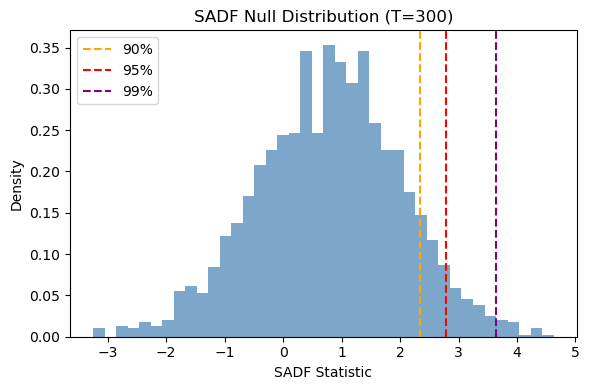

     Critical Value
90%        2.338538
95%        2.778534
99%        3.643377


Running Simulations: |██████████████████████████████| 100% --- 1500/1500

Mean SADF: 4.186
Median SADF: 3.995
Min SADF: -3.246
Max SADF: 12.859
Standard deviation: 3.019
25th percentile: 1.817
75th percentile: 6.34
95th percentile: 9.36
99th percentile: 11.217


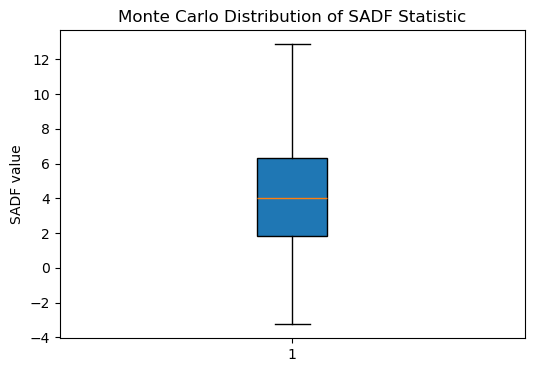

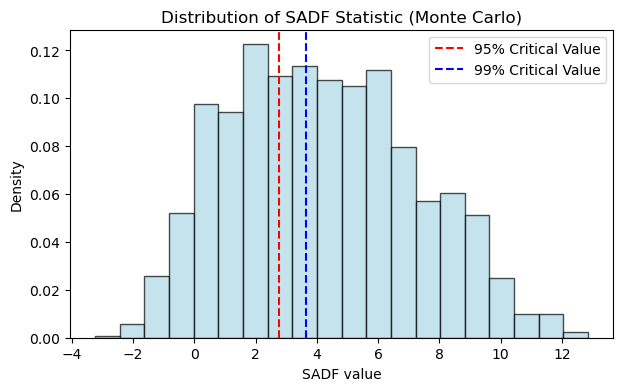

Empirical power at this setting: 0.639


In [42]:
coint_frac = 0.4
B = 2000
crit_val = mf.simulate_sadf_distribution(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers, common_fac = common_fac, e = e)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)
print("\n")

""" Run Experiment """
sadf_list = []
B = 1500
for i in range(B):
    innov = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
    sadf_val = mf.run_sadf_bubble_check_2( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
    sadf_list.append(sadf_val)
    loading_bar(i + 1, B)

sadf_array = np.array(sadf_list)
print("\n")
print("Mean SADF:", np.round(np.mean(sadf_array), 3))
print("Median SADF:", np.round(np.median(sadf_array), 3))
print("Min SADF:", np.round(np.min(sadf_array), 3))
print("Max SADF:", np.round(np.max(sadf_array), 3))
print("Standard deviation:", np.round(np.std(sadf_array), 3))
print("25th percentile:", np.round(np.percentile(sadf_array, 25), 3))
print("75th percentile:", np.round(np.percentile(sadf_array, 75), 3))
print("95th percentile:", np.round(np.percentile(sadf_array, 95), 3))
print("99th percentile:", np.round(np.percentile(sadf_array, 99), 3))

plt.figure(figsize=(6,4))
plt.boxplot(sadf_array, vert=True, patch_artist=True)
plt.title("Monte Carlo Distribution of SADF Statistic")
plt.ylabel("SADF value")
plt.show()

plt.figure(figsize=(7,4))
plt.hist(sadf_array, bins=20, color='lightblue', edgecolor='k', alpha=0.7, density=True)
plt.axvline(crit_val_95, color='red', linestyle='--', label='95% Critical Value')
plt.axvline(crit_val_99, color='blue', linestyle='--', label='99% Critical Value')
plt.title("Distribution of SADF Statistic (Monte Carlo)")
plt.xlabel("SADF value")
plt.ylabel("Density")
plt.legend()
plt.show()

power = np.mean(sadf_array > crit_val_95)
print("Empirical power at this setting:", np.round(power, 3))

mean_val   = np.round(np.mean(sadf_array), 3)
median_val = np.round(np.median(sadf_array), 3)
min_val    = np.round(np.min(sadf_array), 3)
max_val    = np.round(np.max(sadf_array), 3)
std_val    = np.round(np.std(sadf_array), 3)
p25_val    = np.round(np.percentile(sadf_array, 25), 3)
p75_val    = np.round(np.percentile(sadf_array, 75), 3)
p95_val    = np.round(np.percentile(sadf_array, 95), 3)
p99_val    = np.round(np.percentile(sadf_array, 99), 3)

SADF_mean_list.append(mean_val)
SADF_median_list.append(median_val)
SADF_min_list.append(min_val)
SADF_max_list.append(max_val)
SADF_std_list.append(std_val)
SADF_p25_list.append(p25_val)
SADF_p75_list.append(p75_val)
SADF_p95_list.append(p95_val)
SADF_p99_list.append(p99_val)
T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)
power_list.append(power)

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

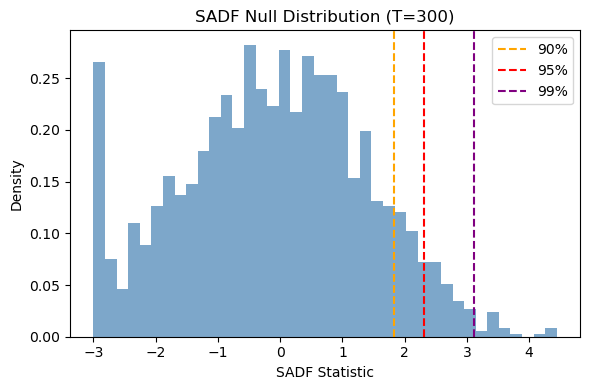

     Critical Value
90%        1.821617
95%        2.307769
99%        3.116104


Running Simulations: |██████████████████████████████| 100% --- 1500/1500

Mean SADF: 3.031
Median SADF: 3.072
Min SADF: -2.998
Max SADF: 10.302
Standard deviation: 2.743
25th percentile: 0.984
75th percentile: 4.98
95th percentile: 7.586
99th percentile: 8.956


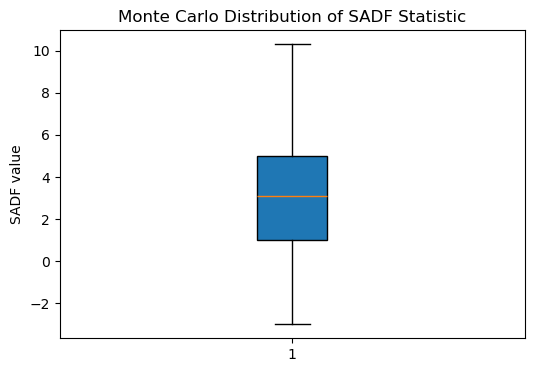

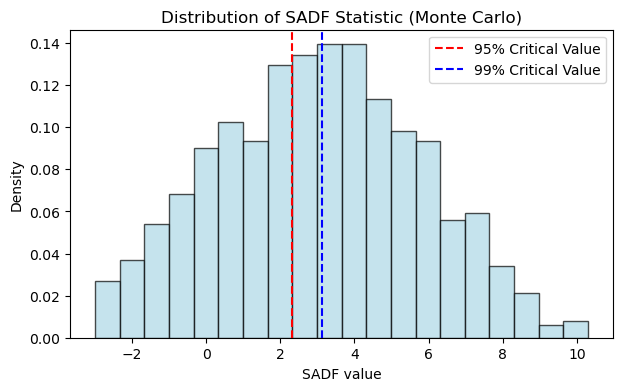

Empirical power at this setting: 0.603


In [43]:
coint_frac = 0.6
B = 2000
crit_val = mf.simulate_sadf_distribution(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers, common_fac = common_fac, e = e)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)
print("\n")

""" Run Experiment """
sadf_list = []
B = 1500
for i in range(B):
    innov = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
    sadf_val = mf.run_sadf_bubble_check_2( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
    sadf_list.append(sadf_val)
    loading_bar(i + 1, B)

sadf_array = np.array(sadf_list)
print("\n")
print("Mean SADF:", np.round(np.mean(sadf_array), 3))
print("Median SADF:", np.round(np.median(sadf_array), 3))
print("Min SADF:", np.round(np.min(sadf_array), 3))
print("Max SADF:", np.round(np.max(sadf_array), 3))
print("Standard deviation:", np.round(np.std(sadf_array), 3))
print("25th percentile:", np.round(np.percentile(sadf_array, 25), 3))
print("75th percentile:", np.round(np.percentile(sadf_array, 75), 3))
print("95th percentile:", np.round(np.percentile(sadf_array, 95), 3))
print("99th percentile:", np.round(np.percentile(sadf_array, 99), 3))

plt.figure(figsize=(6,4))
plt.boxplot(sadf_array, vert=True, patch_artist=True)
plt.title("Monte Carlo Distribution of SADF Statistic")
plt.ylabel("SADF value")
plt.show()

plt.figure(figsize=(7,4))
plt.hist(sadf_array, bins=20, color='lightblue', edgecolor='k', alpha=0.7, density=True)
plt.axvline(crit_val_95, color='red', linestyle='--', label='95% Critical Value')
plt.axvline(crit_val_99, color='blue', linestyle='--', label='99% Critical Value')
plt.title("Distribution of SADF Statistic (Monte Carlo)")
plt.xlabel("SADF value")
plt.ylabel("Density")
plt.legend()
plt.show()

power = np.mean(sadf_array > crit_val_95)
print("Empirical power at this setting:", np.round(power, 3))

mean_val   = np.round(np.mean(sadf_array), 3)
median_val = np.round(np.median(sadf_array), 3)
min_val    = np.round(np.min(sadf_array), 3)
max_val    = np.round(np.max(sadf_array), 3)
std_val    = np.round(np.std(sadf_array), 3)
p25_val    = np.round(np.percentile(sadf_array, 25), 3)
p75_val    = np.round(np.percentile(sadf_array, 75), 3)
p95_val    = np.round(np.percentile(sadf_array, 95), 3)
p99_val    = np.round(np.percentile(sadf_array, 99), 3)

SADF_mean_list.append(mean_val)
SADF_median_list.append(median_val)
SADF_min_list.append(min_val)
SADF_max_list.append(max_val)
SADF_std_list.append(std_val)
SADF_p25_list.append(p25_val)
SADF_p75_list.append(p75_val)
SADF_p95_list.append(p95_val)
SADF_p99_list.append(p99_val)
T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)
power_list.append(power)

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

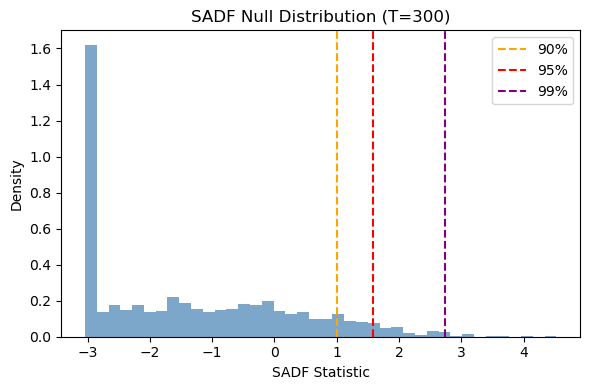

     Critical Value
90%        1.001781
95%        1.576789
99%        2.736181


Running Simulations: |██████████████████████████████| 100% --- 1500/1500

Mean SADF: 0.191
Median SADF: 0.117
Min SADF: -3.043
Max SADF: 7.539
Standard deviation: 2.399
25th percentile: -1.996
75th percentile: 2.047
95th percentile: 4.198
99th percentile: 5.385


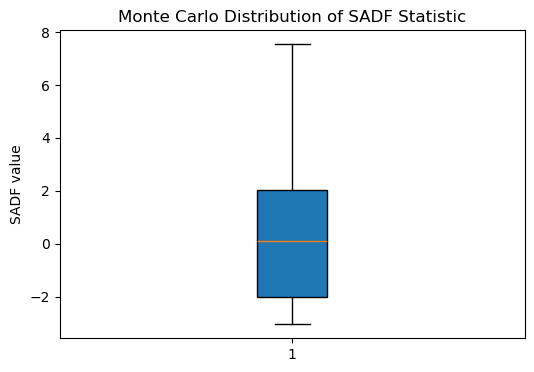

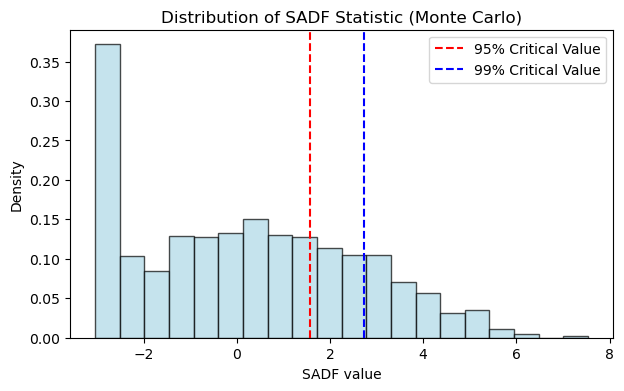

Empirical power at this setting: 0.306


In [44]:
coint_frac = 0.8
B = 2000
crit_val = mf.simulate_sadf_distribution(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers, common_fac = common_fac, e = e)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)
print("\n")

""" Run Experiment """
sadf_list = []
B = 1500
for i in range(B):
    innov = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
    sadf_val = mf.run_sadf_bubble_check_2( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
    sadf_list.append(sadf_val)
    loading_bar(i + 1, B)

sadf_array = np.array(sadf_list)
print("\n")
print("Mean SADF:", np.round(np.mean(sadf_array), 3))
print("Median SADF:", np.round(np.median(sadf_array), 3))
print("Min SADF:", np.round(np.min(sadf_array), 3))
print("Max SADF:", np.round(np.max(sadf_array), 3))
print("Standard deviation:", np.round(np.std(sadf_array), 3))
print("25th percentile:", np.round(np.percentile(sadf_array, 25), 3))
print("75th percentile:", np.round(np.percentile(sadf_array, 75), 3))
print("95th percentile:", np.round(np.percentile(sadf_array, 95), 3))
print("99th percentile:", np.round(np.percentile(sadf_array, 99), 3))

plt.figure(figsize=(6,4))
plt.boxplot(sadf_array, vert=True, patch_artist=True)
plt.title("Monte Carlo Distribution of SADF Statistic")
plt.ylabel("SADF value")
plt.show()

plt.figure(figsize=(7,4))
plt.hist(sadf_array, bins=20, color='lightblue', edgecolor='k', alpha=0.7, density=True)
plt.axvline(crit_val_95, color='red', linestyle='--', label='95% Critical Value')
plt.axvline(crit_val_99, color='blue', linestyle='--', label='99% Critical Value')
plt.title("Distribution of SADF Statistic (Monte Carlo)")
plt.xlabel("SADF value")
plt.ylabel("Density")
plt.legend()
plt.show()

power = np.mean(sadf_array > crit_val_95)
print("Empirical power at this setting:", np.round(power, 3))

mean_val   = np.round(np.mean(sadf_array), 3)
median_val = np.round(np.median(sadf_array), 3)
min_val    = np.round(np.min(sadf_array), 3)
max_val    = np.round(np.max(sadf_array), 3)
std_val    = np.round(np.std(sadf_array), 3)
p25_val    = np.round(np.percentile(sadf_array, 25), 3)
p75_val    = np.round(np.percentile(sadf_array, 75), 3)
p95_val    = np.round(np.percentile(sadf_array, 95), 3)
p99_val    = np.round(np.percentile(sadf_array, 99), 3)

SADF_mean_list.append(mean_val)
SADF_median_list.append(median_val)
SADF_min_list.append(min_val)
SADF_max_list.append(max_val)
SADF_std_list.append(std_val)
SADF_p25_list.append(p25_val)
SADF_p75_list.append(p75_val)
SADF_p95_list.append(p95_val)
SADF_p99_list.append(p99_val)
T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)
power_list.append(power)

## N = 500

In [46]:
T = 500
e = eps[:T,:].copy()
common_fac = z[:T].copy()

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

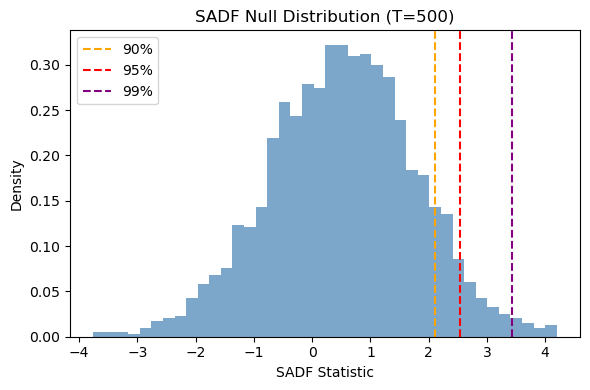

     Critical Value
90%        2.112770
95%        2.540849
99%        3.427167


Running Simulations: |███████████████████-----------| 66% --- 998/1500

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [47]:
coint_frac = 0.4
B = 2000
crit_val = mf.simulate_sadf_distribution(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers, common_fac = common_fac, e = e)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)
print("\n")

""" Run Experiment """
sadf_list = []
B = 1500
for i in range(B):
    innov = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
    sadf_val = mf.run_sadf_bubble_check_2( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
    sadf_list.append(sadf_val)
    loading_bar(i + 1, B)

sadf_array = np.array(sadf_list)
print("\n")
print("Mean SADF:", np.round(np.mean(sadf_array), 3))
print("Median SADF:", np.round(np.median(sadf_array), 3))
print("Min SADF:", np.round(np.min(sadf_array), 3))
print("Max SADF:", np.round(np.max(sadf_array), 3))
print("Standard deviation:", np.round(np.std(sadf_array), 3))
print("25th percentile:", np.round(np.percentile(sadf_array, 25), 3))
print("75th percentile:", np.round(np.percentile(sadf_array, 75), 3))
print("95th percentile:", np.round(np.percentile(sadf_array, 95), 3))
print("99th percentile:", np.round(np.percentile(sadf_array, 99), 3))

plt.figure(figsize=(6,4))
plt.boxplot(sadf_array, vert=True, patch_artist=True)
plt.title("Monte Carlo Distribution of SADF Statistic")
plt.ylabel("SADF value")
plt.show()

plt.figure(figsize=(7,4))
plt.hist(sadf_array, bins=20, color='lightblue', edgecolor='k', alpha=0.7, density=True)
plt.axvline(crit_val_95, color='red', linestyle='--', label='95% Critical Value')
plt.axvline(crit_val_99, color='blue', linestyle='--', label='99% Critical Value')
plt.title("Distribution of SADF Statistic (Monte Carlo)")
plt.xlabel("SADF value")
plt.ylabel("Density")
plt.legend()
plt.show()

power = np.mean(sadf_array > crit_val_95)
print("Empirical power at this setting:", np.round(power, 3))

mean_val   = np.round(np.mean(sadf_array), 3)
median_val = np.round(np.median(sadf_array), 3)
min_val    = np.round(np.min(sadf_array), 3)
max_val    = np.round(np.max(sadf_array), 3)
std_val    = np.round(np.std(sadf_array), 3)
p25_val    = np.round(np.percentile(sadf_array, 25), 3)
p75_val    = np.round(np.percentile(sadf_array, 75), 3)
p95_val    = np.round(np.percentile(sadf_array, 95), 3)
p99_val    = np.round(np.percentile(sadf_array, 99), 3)

SADF_mean_list.append(mean_val)
SADF_median_list.append(median_val)
SADF_min_list.append(min_val)
SADF_max_list.append(max_val)
SADF_std_list.append(std_val)
SADF_p25_list.append(p25_val)
SADF_p75_list.append(p75_val)
SADF_p95_list.append(p95_val)
SADF_p99_list.append(p99_val)
T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)
power_list.append(power)

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

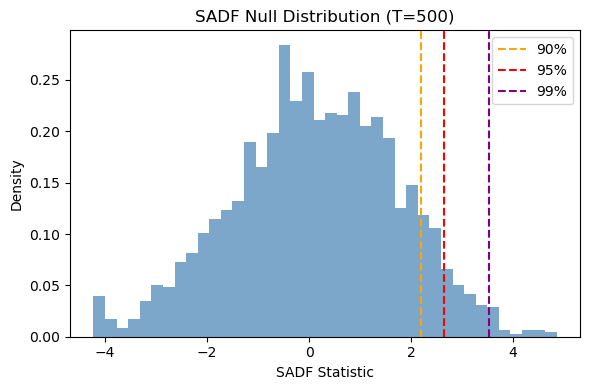

     Critical Value
90%        2.185283
95%        2.639320
99%        3.527196


Running Simulations: |██████████████████████████████| 100% --- 1500/1500

Mean SADF: 9.866
Median SADF: 10.894
Min SADF: -3.128
Max SADF: 19.048
Standard deviation: 5.427
25th percentile: 5.927
75th percentile: 14.348
95th percentile: 17.124
99th percentile: 18.251


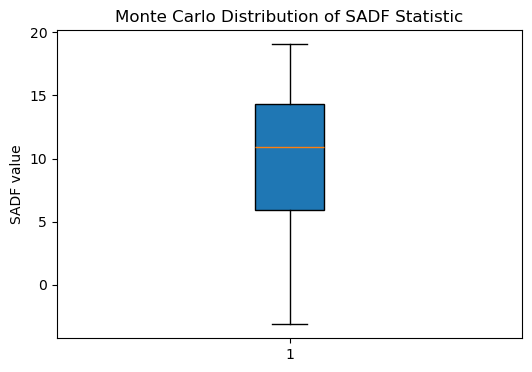

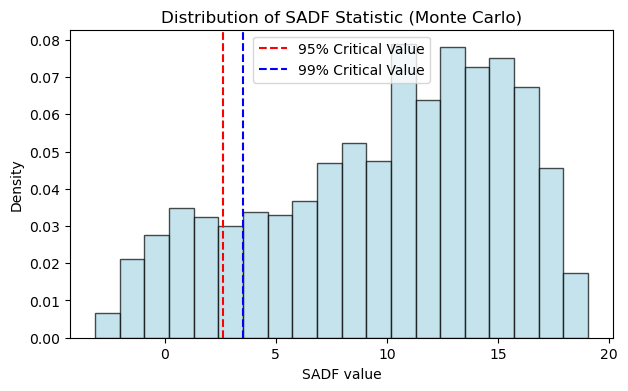

Empirical power at this setting: 0.857


In [48]:
coint_frac = 0.6
B = 2000
crit_val = mf.simulate_sadf_distribution(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers, common_fac = common_fac, e = e)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)
print("\n")

""" Run Experiment """
sadf_list = []
B = 1500
for i in range(B):
    innov = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
    sadf_val = mf.run_sadf_bubble_check_2( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
    sadf_list.append(sadf_val)
    loading_bar(i + 1, B)

sadf_array = np.array(sadf_list)
print("\n")
print("Mean SADF:", np.round(np.mean(sadf_array), 3))
print("Median SADF:", np.round(np.median(sadf_array), 3))
print("Min SADF:", np.round(np.min(sadf_array), 3))
print("Max SADF:", np.round(np.max(sadf_array), 3))
print("Standard deviation:", np.round(np.std(sadf_array), 3))
print("25th percentile:", np.round(np.percentile(sadf_array, 25), 3))
print("75th percentile:", np.round(np.percentile(sadf_array, 75), 3))
print("95th percentile:", np.round(np.percentile(sadf_array, 95), 3))
print("99th percentile:", np.round(np.percentile(sadf_array, 99), 3))

plt.figure(figsize=(6,4))
plt.boxplot(sadf_array, vert=True, patch_artist=True)
plt.title("Monte Carlo Distribution of SADF Statistic")
plt.ylabel("SADF value")
plt.show()

plt.figure(figsize=(7,4))
plt.hist(sadf_array, bins=20, color='lightblue', edgecolor='k', alpha=0.7, density=True)
plt.axvline(crit_val_95, color='red', linestyle='--', label='95% Critical Value')
plt.axvline(crit_val_99, color='blue', linestyle='--', label='99% Critical Value')
plt.title("Distribution of SADF Statistic (Monte Carlo)")
plt.xlabel("SADF value")
plt.ylabel("Density")
plt.legend()
plt.show()

power = np.mean(sadf_array > crit_val_95)
print("Empirical power at this setting:", np.round(power, 3))

mean_val   = np.round(np.mean(sadf_array), 3)
median_val = np.round(np.median(sadf_array), 3)
min_val    = np.round(np.min(sadf_array), 3)
max_val    = np.round(np.max(sadf_array), 3)
std_val    = np.round(np.std(sadf_array), 3)
p25_val    = np.round(np.percentile(sadf_array, 25), 3)
p75_val    = np.round(np.percentile(sadf_array, 75), 3)
p95_val    = np.round(np.percentile(sadf_array, 95), 3)
p99_val    = np.round(np.percentile(sadf_array, 99), 3)

SADF_mean_list.append(mean_val)
SADF_median_list.append(median_val)
SADF_min_list.append(min_val)
SADF_max_list.append(max_val)
SADF_std_list.append(std_val)
SADF_p25_list.append(p25_val)
SADF_p75_list.append(p75_val)
SADF_p95_list.append(p95_val)
SADF_p99_list.append(p99_val)
T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)
power_list.append(power)

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

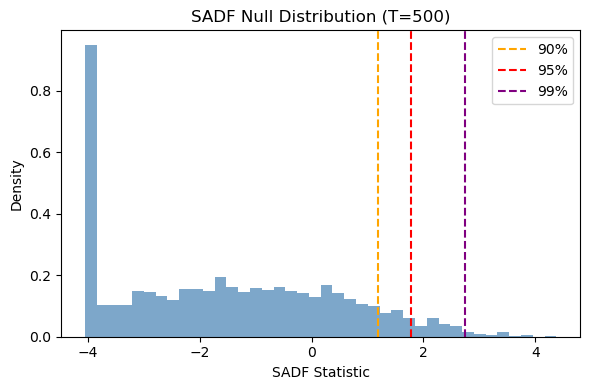

     Critical Value
90%        1.181269
95%        1.777320
99%        2.751529


Running Simulations: |██████████████████████████████| 100% --- 1500/1500

Mean SADF: 5.091
Median SADF: 5.562
Min SADF: -4.049
Max SADF: 13.37
Standard deviation: 3.397
25th percentile: 3.169
75th percentile: 7.505
95th percentile: 9.986
99th percentile: 11.451


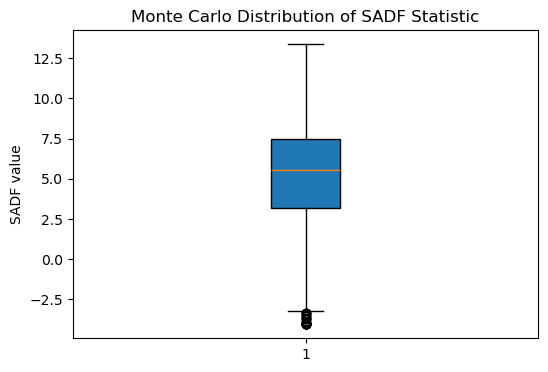

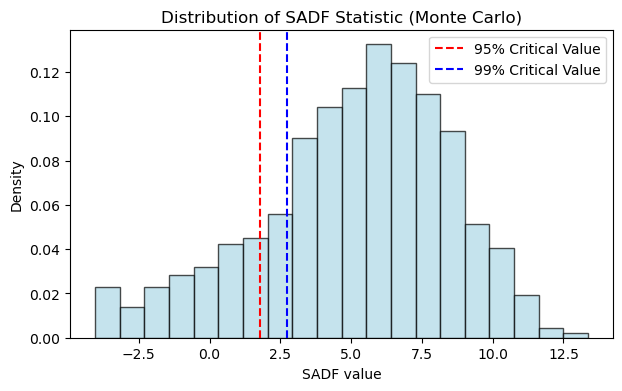

Empirical power at this setting: 0.833


In [49]:
coint_frac = 0.8
B = 2000
crit_val = mf.simulate_sadf_distribution(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers, common_fac = common_fac, e = e)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)
print("\n")

""" Run Experiment """
sadf_list = []
B = 1500
for i in range(B):
    innov = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
    sadf_val = mf.run_sadf_bubble_check_2( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
    sadf_list.append(sadf_val)
    loading_bar(i + 1, B)

sadf_array = np.array(sadf_list)
print("\n")
print("Mean SADF:", np.round(np.mean(sadf_array), 3))
print("Median SADF:", np.round(np.median(sadf_array), 3))
print("Min SADF:", np.round(np.min(sadf_array), 3))
print("Max SADF:", np.round(np.max(sadf_array), 3))
print("Standard deviation:", np.round(np.std(sadf_array), 3))
print("25th percentile:", np.round(np.percentile(sadf_array, 25), 3))
print("75th percentile:", np.round(np.percentile(sadf_array, 75), 3))
print("95th percentile:", np.round(np.percentile(sadf_array, 95), 3))
print("99th percentile:", np.round(np.percentile(sadf_array, 99), 3))

plt.figure(figsize=(6,4))
plt.boxplot(sadf_array, vert=True, patch_artist=True)
plt.title("Monte Carlo Distribution of SADF Statistic")
plt.ylabel("SADF value")
plt.show()

plt.figure(figsize=(7,4))
plt.hist(sadf_array, bins=20, color='lightblue', edgecolor='k', alpha=0.7, density=True)
plt.axvline(crit_val_95, color='red', linestyle='--', label='95% Critical Value')
plt.axvline(crit_val_99, color='blue', linestyle='--', label='99% Critical Value')
plt.title("Distribution of SADF Statistic (Monte Carlo)")
plt.xlabel("SADF value")
plt.ylabel("Density")
plt.legend()
plt.show()

power = np.mean(sadf_array > crit_val_95)
print("Empirical power at this setting:", np.round(power, 3))

mean_val   = np.round(np.mean(sadf_array), 3)
median_val = np.round(np.median(sadf_array), 3)
min_val    = np.round(np.min(sadf_array), 3)
max_val    = np.round(np.max(sadf_array), 3)
std_val    = np.round(np.std(sadf_array), 3)
p25_val    = np.round(np.percentile(sadf_array, 25), 3)
p75_val    = np.round(np.percentile(sadf_array, 75), 3)
p95_val    = np.round(np.percentile(sadf_array, 95), 3)
p99_val    = np.round(np.percentile(sadf_array, 99), 3)

SADF_mean_list.append(mean_val)
SADF_median_list.append(median_val)
SADF_min_list.append(min_val)
SADF_max_list.append(max_val)
SADF_std_list.append(std_val)
SADF_p25_list.append(p25_val)
SADF_p75_list.append(p75_val)
SADF_p95_list.append(p95_val)
SADF_p99_list.append(p99_val)
T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)
power_list.append(power)

## N = 800

In [51]:
T = 800
e = eps[:T,:].copy()
common_fac = z[:T].copy()

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

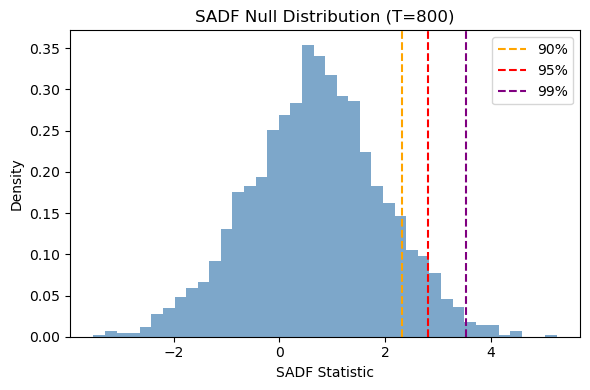

     Critical Value
90%        2.319979
95%        2.814039
99%        3.533541


Running Simulations: |██████████████████████████████| 100% --- 1500/1500

Mean SADF: 23.7
Median SADF: 23.854
Min SADF: -0.538
Max SADF: 26.775
Standard deviation: 1.817
25th percentile: 23.276
75th percentile: 24.419
95th percentile: 25.296
99th percentile: 25.942


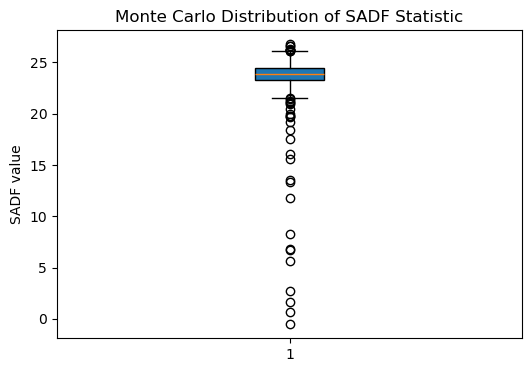

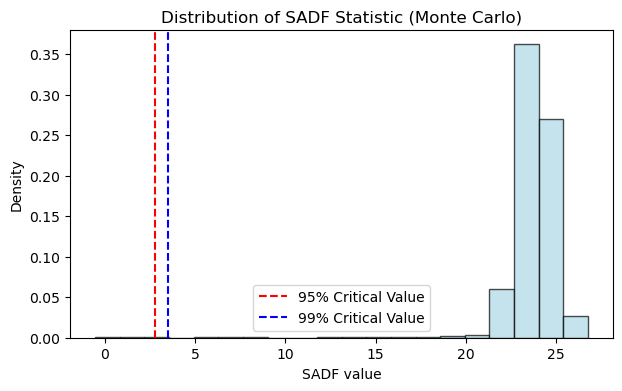

Empirical power at this setting: 0.997


In [52]:
coint_frac = 0.4
B = 2000
crit_val = mf.simulate_sadf_distribution(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers, common_fac = common_fac, e = e)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)
print("\n")

""" Run Experiment """
sadf_list = []
B = 1500
for i in range(B):
    innov = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
    sadf_val = mf.run_sadf_bubble_check_2( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
    sadf_list.append(sadf_val)
    loading_bar(i + 1, B)

sadf_array = np.array(sadf_list)
print("\n")
print("Mean SADF:", np.round(np.mean(sadf_array), 3))
print("Median SADF:", np.round(np.median(sadf_array), 3))
print("Min SADF:", np.round(np.min(sadf_array), 3))
print("Max SADF:", np.round(np.max(sadf_array), 3))
print("Standard deviation:", np.round(np.std(sadf_array), 3))
print("25th percentile:", np.round(np.percentile(sadf_array, 25), 3))
print("75th percentile:", np.round(np.percentile(sadf_array, 75), 3))
print("95th percentile:", np.round(np.percentile(sadf_array, 95), 3))
print("99th percentile:", np.round(np.percentile(sadf_array, 99), 3))

plt.figure(figsize=(6,4))
plt.boxplot(sadf_array, vert=True, patch_artist=True)
plt.title("Monte Carlo Distribution of SADF Statistic")
plt.ylabel("SADF value")
plt.show()

plt.figure(figsize=(7,4))
plt.hist(sadf_array, bins=20, color='lightblue', edgecolor='k', alpha=0.7, density=True)
plt.axvline(crit_val_95, color='red', linestyle='--', label='95% Critical Value')
plt.axvline(crit_val_99, color='blue', linestyle='--', label='99% Critical Value')
plt.title("Distribution of SADF Statistic (Monte Carlo)")
plt.xlabel("SADF value")
plt.ylabel("Density")
plt.legend()
plt.show()

power = np.mean(sadf_array > crit_val_95)
print("Empirical power at this setting:", np.round(power, 3))

mean_val   = np.round(np.mean(sadf_array), 3)
median_val = np.round(np.median(sadf_array), 3)
min_val    = np.round(np.min(sadf_array), 3)
max_val    = np.round(np.max(sadf_array), 3)
std_val    = np.round(np.std(sadf_array), 3)
p25_val    = np.round(np.percentile(sadf_array, 25), 3)
p75_val    = np.round(np.percentile(sadf_array, 75), 3)
p95_val    = np.round(np.percentile(sadf_array, 95), 3)
p99_val    = np.round(np.percentile(sadf_array, 99), 3)

SADF_mean_list.append(mean_val)
SADF_median_list.append(median_val)
SADF_min_list.append(min_val)
SADF_max_list.append(max_val)
SADF_std_list.append(std_val)
SADF_p25_list.append(p25_val)
SADF_p75_list.append(p75_val)
SADF_p95_list.append(p95_val)
SADF_p99_list.append(p99_val)
T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)
power_list.append(power)

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

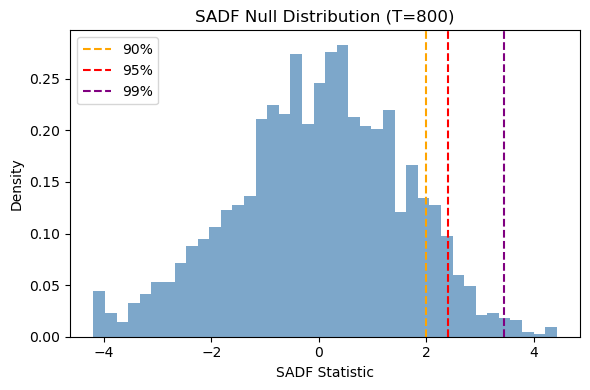

     Critical Value
90%        2.003685
95%        2.400710
99%        3.438463


Running Simulations: |██████████████████████████████| 100% --- 1500/1500

Mean SADF: 25.438
Median SADF: 26.37
Min SADF: -1.394
Max SADF: 29.009
Standard deviation: 3.884
25th percentile: 25.54
75th percentile: 27.015
95th percentile: 27.806
99th percentile: 28.336


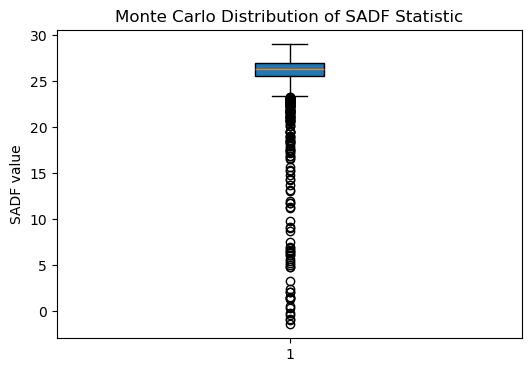

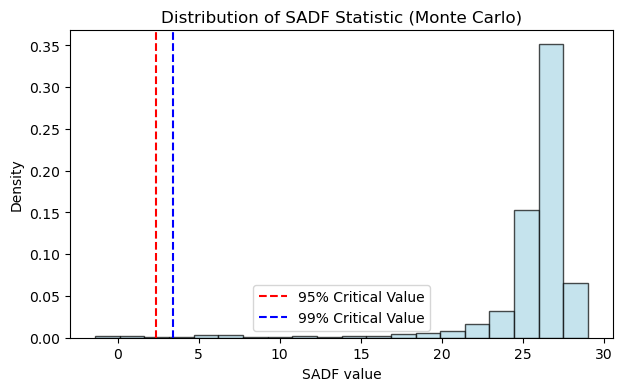

Empirical power at this setting: 0.991


In [53]:
coint_frac = 0.6
B = 2000
crit_val = mf.simulate_sadf_distribution(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers, common_fac = common_fac, e = e)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)
print("\n")

""" Run Experiment """
sadf_list = []
B = 1500
for i in range(B):
    innov = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
    sadf_val = mf.run_sadf_bubble_check_2( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
    sadf_list.append(sadf_val)
    loading_bar(i + 1, B)

sadf_array = np.array(sadf_list)
print("\n")
print("Mean SADF:", np.round(np.mean(sadf_array), 3))
print("Median SADF:", np.round(np.median(sadf_array), 3))
print("Min SADF:", np.round(np.min(sadf_array), 3))
print("Max SADF:", np.round(np.max(sadf_array), 3))
print("Standard deviation:", np.round(np.std(sadf_array), 3))
print("25th percentile:", np.round(np.percentile(sadf_array, 25), 3))
print("75th percentile:", np.round(np.percentile(sadf_array, 75), 3))
print("95th percentile:", np.round(np.percentile(sadf_array, 95), 3))
print("99th percentile:", np.round(np.percentile(sadf_array, 99), 3))

plt.figure(figsize=(6,4))
plt.boxplot(sadf_array, vert=True, patch_artist=True)
plt.title("Monte Carlo Distribution of SADF Statistic")
plt.ylabel("SADF value")
plt.show()

plt.figure(figsize=(7,4))
plt.hist(sadf_array, bins=20, color='lightblue', edgecolor='k', alpha=0.7, density=True)
plt.axvline(crit_val_95, color='red', linestyle='--', label='95% Critical Value')
plt.axvline(crit_val_99, color='blue', linestyle='--', label='99% Critical Value')
plt.title("Distribution of SADF Statistic (Monte Carlo)")
plt.xlabel("SADF value")
plt.ylabel("Density")
plt.legend()
plt.show()

power = np.mean(sadf_array > crit_val_95)
print("Empirical power at this setting:", np.round(power, 3))

mean_val   = np.round(np.mean(sadf_array), 3)
median_val = np.round(np.median(sadf_array), 3)
min_val    = np.round(np.min(sadf_array), 3)
max_val    = np.round(np.max(sadf_array), 3)
std_val    = np.round(np.std(sadf_array), 3)
p25_val    = np.round(np.percentile(sadf_array, 25), 3)
p75_val    = np.round(np.percentile(sadf_array, 75), 3)
p95_val    = np.round(np.percentile(sadf_array, 95), 3)
p99_val    = np.round(np.percentile(sadf_array, 99), 3)

SADF_mean_list.append(mean_val)
SADF_median_list.append(median_val)
SADF_min_list.append(min_val)
SADF_max_list.append(max_val)
SADF_std_list.append(std_val)
SADF_p25_list.append(p25_val)
SADF_p75_list.append(p75_val)
SADF_p95_list.append(p95_val)
SADF_p99_list.append(p99_val)
T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)
power_list.append(power)

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

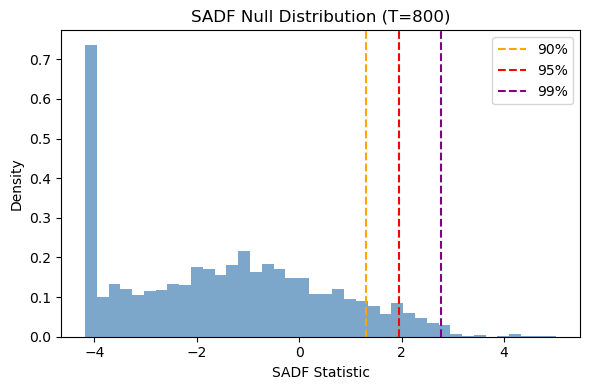

     Critical Value
90%        1.307531
95%        1.949454
99%        2.773315


Running Simulations: |█████████████████████████████-| 98% --- 1471/1500

In [ ]:
coint_frac = 0.8
B = 2000
crit_val = mf.simulate_sadf_distribution(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers, common_fac = common_fac, e = e)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)
print("\n")

""" Run Experiment """
sadf_list = []
B = 1500
for i in range(B):
    innov = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
    sadf_val = mf.run_sadf_bubble_check_2( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
    sadf_list.append(sadf_val)
    loading_bar(i + 1, B)

sadf_array = np.array(sadf_list)
print("\n")
print("Mean SADF:", np.round(np.mean(sadf_array), 3))
print("Median SADF:", np.round(np.median(sadf_array), 3))
print("Min SADF:", np.round(np.min(sadf_array), 3))
print("Max SADF:", np.round(np.max(sadf_array), 3))
print("Standard deviation:", np.round(np.std(sadf_array), 3))
print("25th percentile:", np.round(np.percentile(sadf_array, 25), 3))
print("75th percentile:", np.round(np.percentile(sadf_array, 75), 3))
print("95th percentile:", np.round(np.percentile(sadf_array, 95), 3))
print("99th percentile:", np.round(np.percentile(sadf_array, 99), 3))

plt.figure(figsize=(6,4))
plt.boxplot(sadf_array, vert=True, patch_artist=True)
plt.title("Monte Carlo Distribution of SADF Statistic")
plt.ylabel("SADF value")
plt.show()

plt.figure(figsize=(7,4))
plt.hist(sadf_array, bins=20, color='lightblue', edgecolor='k', alpha=0.7, density=True)
plt.axvline(crit_val_95, color='red', linestyle='--', label='95% Critical Value')
plt.axvline(crit_val_99, color='blue', linestyle='--', label='99% Critical Value')
plt.title("Distribution of SADF Statistic (Monte Carlo)")
plt.xlabel("SADF value")
plt.ylabel("Density")
plt.legend()
plt.show()

power = np.mean(sadf_array > crit_val_95)
print("Empirical power at this setting:", np.round(power, 3))

mean_val   = np.round(np.mean(sadf_array), 3)
median_val = np.round(np.median(sadf_array), 3)
min_val    = np.round(np.min(sadf_array), 3)
max_val    = np.round(np.max(sadf_array), 3)
std_val    = np.round(np.std(sadf_array), 3)
p25_val    = np.round(np.percentile(sadf_array, 25), 3)
p75_val    = np.round(np.percentile(sadf_array, 75), 3)
p95_val    = np.round(np.percentile(sadf_array, 95), 3)
p99_val    = np.round(np.percentile(sadf_array, 99), 3)

SADF_mean_list.append(mean_val)
SADF_median_list.append(median_val)
SADF_min_list.append(min_val)
SADF_max_list.append(max_val)
SADF_std_list.append(std_val)
SADF_p25_list.append(p25_val)
SADF_p75_list.append(p75_val)
SADF_p95_list.append(p95_val)
SADF_p99_list.append(p99_val)
T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)
power_list.append(power)

## N = 1000

In [ ]:
T = 1000
e = eps[:T,:].copy()
common_fac = z[:T].copy()

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

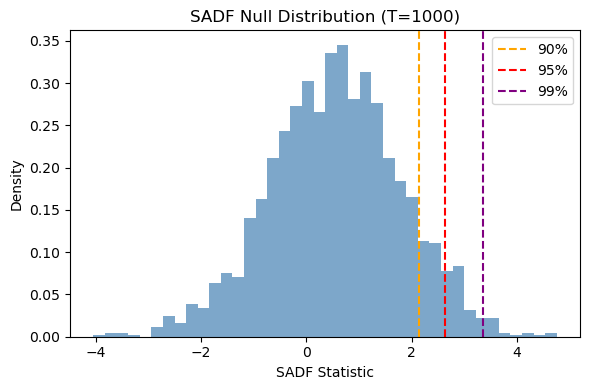

     Critical Value
90%        2.145191
95%        2.626158
99%        3.356684


Running Simulations: |██████████████████████████████| 100% --- 1500/1500

Mean SADF: 26.947
Median SADF: 26.929
Min SADF: 17.506
Max SADF: 30.016
Standard deviation: 0.837
25th percentile: 26.402
75th percentile: 27.485
95th percentile: 28.222
99th percentile: 28.935


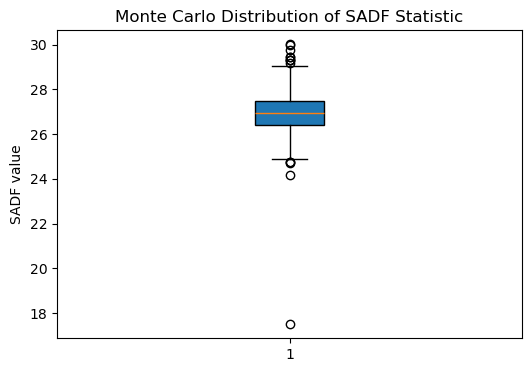

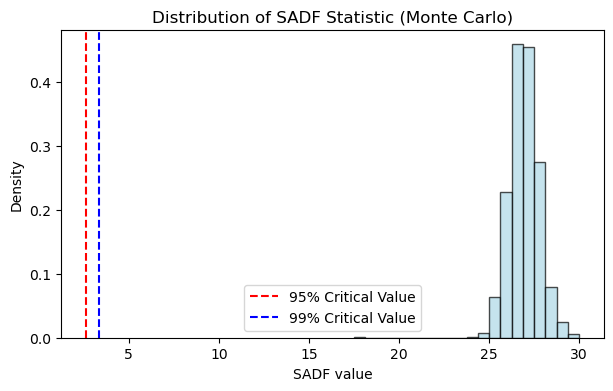

Empirical power at this setting: 1.0


In [57]:
coint_frac = 0.4
B = 2000
crit_val = mf.simulate_sadf_distribution(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers, common_fac = common_fac, e = e)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)
print("\n")

""" Run Experiment """
sadf_list = []
B = 1500
for i in range(B):
    innov = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
    sadf_val = mf.run_sadf_bubble_check_2( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
    sadf_list.append(sadf_val)
    loading_bar(i + 1, B)

sadf_array = np.array(sadf_list)
print("\n")
print("Mean SADF:", np.round(np.mean(sadf_array), 3))
print("Median SADF:", np.round(np.median(sadf_array), 3))
print("Min SADF:", np.round(np.min(sadf_array), 3))
print("Max SADF:", np.round(np.max(sadf_array), 3))
print("Standard deviation:", np.round(np.std(sadf_array), 3))
print("25th percentile:", np.round(np.percentile(sadf_array, 25), 3))
print("75th percentile:", np.round(np.percentile(sadf_array, 75), 3))
print("95th percentile:", np.round(np.percentile(sadf_array, 95), 3))
print("99th percentile:", np.round(np.percentile(sadf_array, 99), 3))

plt.figure(figsize=(6,4))
plt.boxplot(sadf_array, vert=True, patch_artist=True)
plt.title("Monte Carlo Distribution of SADF Statistic")
plt.ylabel("SADF value")
plt.show()

plt.figure(figsize=(7,4))
plt.hist(sadf_array, bins=20, color='lightblue', edgecolor='k', alpha=0.7, density=True)
plt.axvline(crit_val_95, color='red', linestyle='--', label='95% Critical Value')
plt.axvline(crit_val_99, color='blue', linestyle='--', label='99% Critical Value')
plt.title("Distribution of SADF Statistic (Monte Carlo)")
plt.xlabel("SADF value")
plt.ylabel("Density")
plt.legend()
plt.show()

power = np.mean(sadf_array > crit_val_95)
print("Empirical power at this setting:", np.round(power, 3))

mean_val   = np.round(np.mean(sadf_array), 3)
median_val = np.round(np.median(sadf_array), 3)
min_val    = np.round(np.min(sadf_array), 3)
max_val    = np.round(np.max(sadf_array), 3)
std_val    = np.round(np.std(sadf_array), 3)
p25_val    = np.round(np.percentile(sadf_array, 25), 3)
p75_val    = np.round(np.percentile(sadf_array, 75), 3)
p95_val    = np.round(np.percentile(sadf_array, 95), 3)
p99_val    = np.round(np.percentile(sadf_array, 99), 3)

SADF_mean_list.append(mean_val)
SADF_median_list.append(median_val)
SADF_min_list.append(min_val)
SADF_max_list.append(max_val)
SADF_std_list.append(std_val)
SADF_p25_list.append(p25_val)
SADF_p75_list.append(p75_val)
SADF_p95_list.append(p95_val)
SADF_p99_list.append(p99_val)
T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)
power_list.append(power)

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

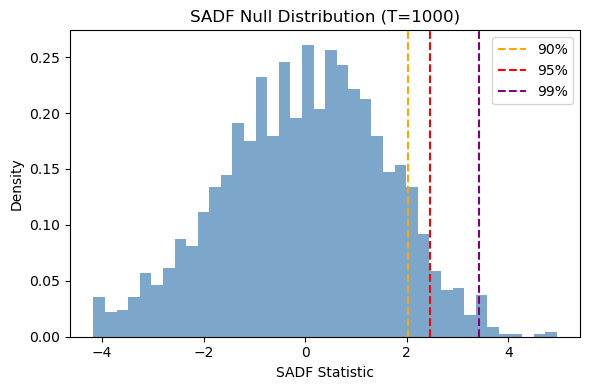

     Critical Value
90%        2.014916
95%        2.452324
99%        3.422129


Running Simulations: |██████████████████████████████| 100% --- 1500/1500

Mean SADF: 30.005
Median SADF: 30.714
Min SADF: -2.104
Max SADF: 33.327
Standard deviation: 3.573
25th percentile: 30.011
75th percentile: 31.314
95th percentile: 32.095
99th percentile: 32.606


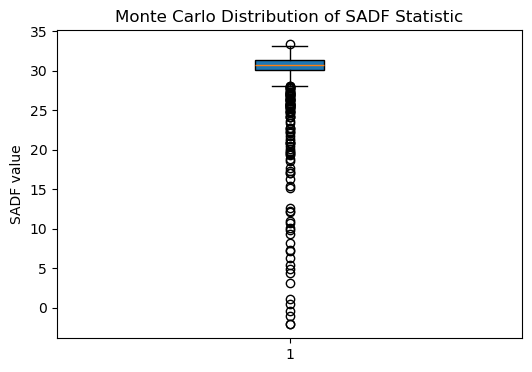

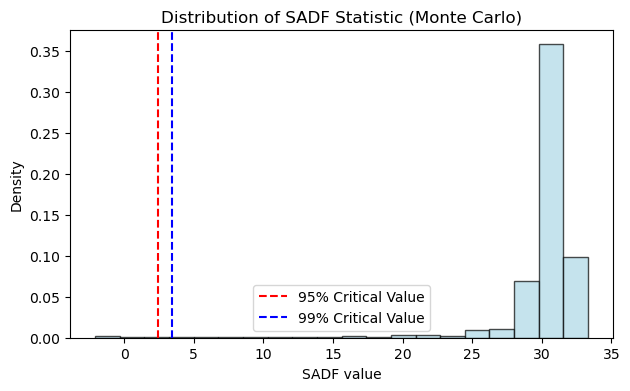

Empirical power at this setting: 0.996


In [58]:
coint_frac = 0.6
B = 2000
crit_val = mf.simulate_sadf_distribution(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers, common_fac = common_fac, e = e)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)
print("\n")

""" Run Experiment """
sadf_list = []
B = 1500
for i in range(B):
    innov = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
    sadf_val = mf.run_sadf_bubble_check_2( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
    sadf_list.append(sadf_val)
    loading_bar(i + 1, B)

sadf_array = np.array(sadf_list)
print("\n")
print("Mean SADF:", np.round(np.mean(sadf_array), 3))
print("Median SADF:", np.round(np.median(sadf_array), 3))
print("Min SADF:", np.round(np.min(sadf_array), 3))
print("Max SADF:", np.round(np.max(sadf_array), 3))
print("Standard deviation:", np.round(np.std(sadf_array), 3))
print("25th percentile:", np.round(np.percentile(sadf_array, 25), 3))
print("75th percentile:", np.round(np.percentile(sadf_array, 75), 3))
print("95th percentile:", np.round(np.percentile(sadf_array, 95), 3))
print("99th percentile:", np.round(np.percentile(sadf_array, 99), 3))

plt.figure(figsize=(6,4))
plt.boxplot(sadf_array, vert=True, patch_artist=True)
plt.title("Monte Carlo Distribution of SADF Statistic")
plt.ylabel("SADF value")
plt.show()

plt.figure(figsize=(7,4))
plt.hist(sadf_array, bins=20, color='lightblue', edgecolor='k', alpha=0.7, density=True)
plt.axvline(crit_val_95, color='red', linestyle='--', label='95% Critical Value')
plt.axvline(crit_val_99, color='blue', linestyle='--', label='99% Critical Value')
plt.title("Distribution of SADF Statistic (Monte Carlo)")
plt.xlabel("SADF value")
plt.ylabel("Density")
plt.legend()
plt.show()

power = np.mean(sadf_array > crit_val_95)
print("Empirical power at this setting:", np.round(power, 3))

mean_val   = np.round(np.mean(sadf_array), 3)
median_val = np.round(np.median(sadf_array), 3)
min_val    = np.round(np.min(sadf_array), 3)
max_val    = np.round(np.max(sadf_array), 3)
std_val    = np.round(np.std(sadf_array), 3)
p25_val    = np.round(np.percentile(sadf_array, 25), 3)
p75_val    = np.round(np.percentile(sadf_array, 75), 3)
p95_val    = np.round(np.percentile(sadf_array, 95), 3)
p99_val    = np.round(np.percentile(sadf_array, 99), 3)

SADF_mean_list.append(mean_val)
SADF_median_list.append(median_val)
SADF_min_list.append(min_val)
SADF_max_list.append(max_val)
SADF_std_list.append(std_val)
SADF_p25_list.append(p25_val)
SADF_p75_list.append(p75_val)
SADF_p95_list.append(p95_val)
SADF_p99_list.append(p99_val)
T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)
power_list.append(power)

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

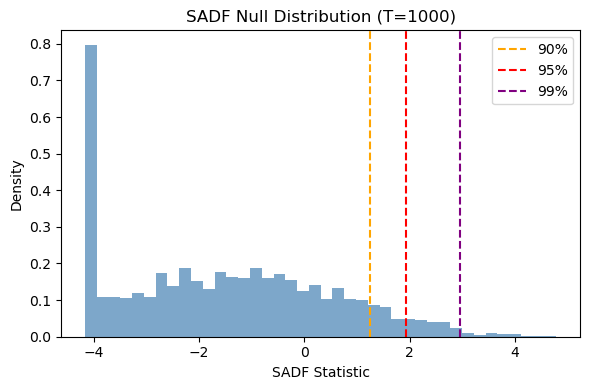

     Critical Value
90%        1.255080
95%        1.938906
99%        2.951577


Running Simulations: |██████████████████████████████| 100% --- 1500/1500

Mean SADF: 10.532
Median SADF: 10.414
Min SADF: -4.169
Max SADF: 28.008
Standard deviation: 7.761
25th percentile: 4.613
75th percentile: 16.603
95th percentile: 23.098
99th percentile: 26.218


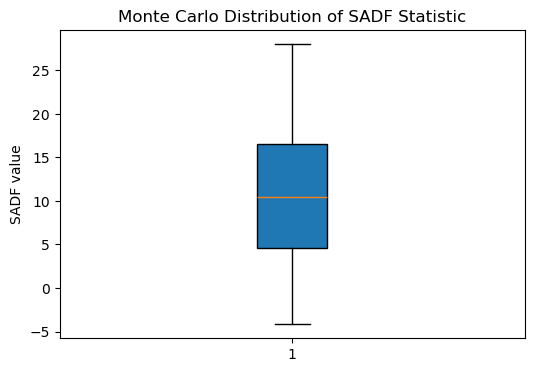

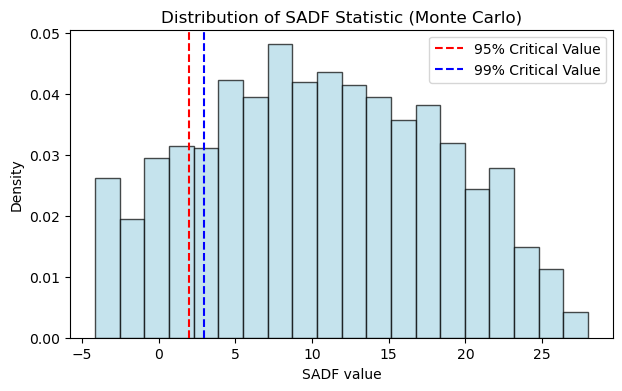

Empirical power at this setting: 0.839


In [59]:
coint_frac = 0.8
B = 2000
crit_val = mf.simulate_sadf_distribution(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers, common_fac = common_fac, e = e)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)
print("\n")

""" Run Experiment """
sadf_list = []
B = 1500
for i in range(B):
    innov = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
    sadf_val = mf.run_sadf_bubble_check_2( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
    sadf_list.append(sadf_val)
    loading_bar(i + 1, B)

sadf_array = np.array(sadf_list)
print("\n")
print("Mean SADF:", np.round(np.mean(sadf_array), 3))
print("Median SADF:", np.round(np.median(sadf_array), 3))
print("Min SADF:", np.round(np.min(sadf_array), 3))
print("Max SADF:", np.round(np.max(sadf_array), 3))
print("Standard deviation:", np.round(np.std(sadf_array), 3))
print("25th percentile:", np.round(np.percentile(sadf_array, 25), 3))
print("75th percentile:", np.round(np.percentile(sadf_array, 75), 3))
print("95th percentile:", np.round(np.percentile(sadf_array, 95), 3))
print("99th percentile:", np.round(np.percentile(sadf_array, 99), 3))

plt.figure(figsize=(6,4))
plt.boxplot(sadf_array, vert=True, patch_artist=True)
plt.title("Monte Carlo Distribution of SADF Statistic")
plt.ylabel("SADF value")
plt.show()

plt.figure(figsize=(7,4))
plt.hist(sadf_array, bins=20, color='lightblue', edgecolor='k', alpha=0.7, density=True)
plt.axvline(crit_val_95, color='red', linestyle='--', label='95% Critical Value')
plt.axvline(crit_val_99, color='blue', linestyle='--', label='99% Critical Value')
plt.title("Distribution of SADF Statistic (Monte Carlo)")
plt.xlabel("SADF value")
plt.ylabel("Density")
plt.legend()
plt.show()

power = np.mean(sadf_array > crit_val_95)
print("Empirical power at this setting:", np.round(power, 3))

mean_val   = np.round(np.mean(sadf_array), 3)
median_val = np.round(np.median(sadf_array), 3)
min_val    = np.round(np.min(sadf_array), 3)
max_val    = np.round(np.max(sadf_array), 3)
std_val    = np.round(np.std(sadf_array), 3)
p25_val    = np.round(np.percentile(sadf_array, 25), 3)
p75_val    = np.round(np.percentile(sadf_array, 75), 3)
p95_val    = np.round(np.percentile(sadf_array, 95), 3)
p99_val    = np.round(np.percentile(sadf_array, 99), 3)

SADF_mean_list.append(mean_val)
SADF_median_list.append(median_val)
SADF_min_list.append(min_val)
SADF_max_list.append(max_val)
SADF_std_list.append(std_val)
SADF_p25_list.append(p25_val)
SADF_p75_list.append(p75_val)
SADF_p95_list.append(p95_val)
SADF_p99_list.append(p99_val)
T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)
power_list.append(power)

In [60]:
df = pd.DataFrame({
    'T':                 T_list,
    'num_series':        num_series_list,
    'coint_frac':        coint_frac_list,
    'num_of_rw':         num_of_rw_list,
    'SADF_mean':         SADF_mean_list,
    'SADF_median':       SADF_median_list,
    'SADF_min':          SADF_min_list,
    'SADF_max':          SADF_max_list,
    'SADF_std':          SADF_std_list,
    'SADF_p25':          SADF_p25_list,
    'SADF_p75':          SADF_p75_list,
    'SADF_p95':          SADF_p95_list,
    'SADF_p99':          SADF_p99_list,
    'crit_95':           crit_95_list,
    'crit_99':           crit_99_list,
    'power':             power_list
})

output_filename = f"{num_series}_Series_Experiment.csv"
df.to_csv(output_filename, index=False)
print(f"Results written to {output_filename}")
import sounddevice as sd
fs = 50100  # sample rate
t = np.linspace(0, 2, fs, False)             # 1 second
sd.play(np.sin(2 * np.pi * 440 * t) * 0.5, fs)  # 440 Hz at half volume
sd.wait()
np.random.seed(22)

Results written to 25_Series_Experiment.csv
